In [1]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [68]:
seed = 10
N = 500
theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 2
t = np.arange(0, 9000, 0.1)
K = 6
sum_time = 1500
theta, dtheta, rs = mf2(K, N=N, m=m, t_array=t,
                        p_theta=theta_random, p_dtheta=omega, p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]
dtheta_c = np.cumsum(dtheta, axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)
multi = 1.5
CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=1e-2, c_std=3, check=3e-4, c_size=5, N=500, omega=omega)

In [47]:
CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=1e-2, c_std=3, check=3e-4, c_size=5, N=500, omega=omega)

In [10]:
# theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# qomega = np.sort(omega)-np.mean(omega)

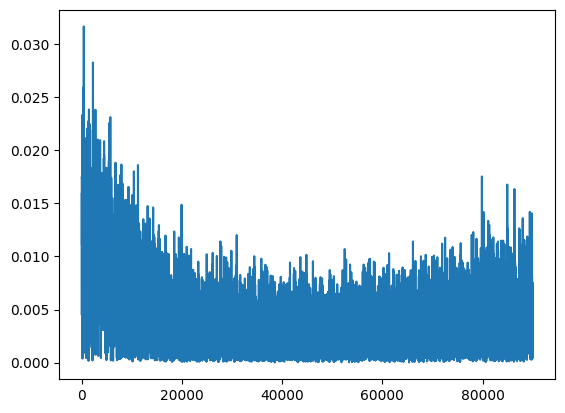

In [69]:
plt.plot(rs)

In [27]:
mean_r

0.6472778354971225

In [65]:
region = rs[-5000:]
mean_r = np.mean(region)
print(mean_r)
max_r, min_r = np.max(region), np.min(region)

0.6416863456440697


In [66]:
def O_p(Kr, m=m): return (4/np.pi)*np.sqrt(Kr/m)


def r_p(O, K=K, m=m): return (np.pi/4)**2*m/K*O

-0.05047924903498999
0.05045928153465682
-1.3344829117761503
-0.2920382233560805
0.40647146520535743
1.1160029715770388


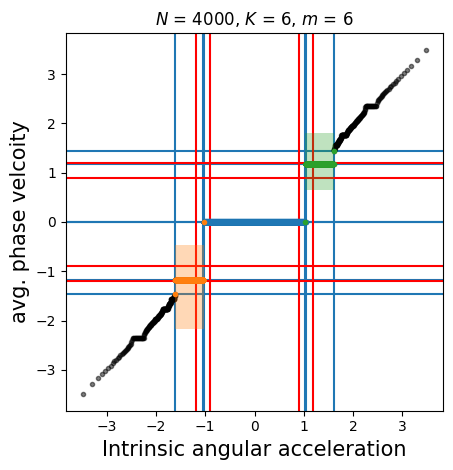

In [67]:
a_dtheta = np.sort(avg_dtheta[-1])
d_region = dtheta[-5000:]
for i, c in enumerate(cluster):
    c = np.sort(c)
    if i == 0:
        mean_o = np.mean(omega[c])
        mean_p = np.mean(a_dtheta[c])
    plt.plot(omega[c], a_dtheta[c], '.')
    plt.axvline(omega[c[0]], zorder=-1)
    plt.fill_between([np.min(omega[c]), np.max(omega[c])], np.min(
        d_region[:, c]), np.max(d_region[:, c]), alpha=0.3)
    plt.axhline(a_dtheta[c[0]], zorder=-1)
    print(r_p(np.min(d_region[:, c])))
    print(r_p(np.max(d_region[:, c])))

    plt.axhline(a_dtheta[c[-1]], zorder=-1)
    plt.axvline(omega[c[-1]], zorder=-1)
plt.plot(omega, a_dtheta, '.', zorder=0, color='black', alpha=0.5)
# plt.plot([omega[0],omega[-1]],[omega[0],omega[-1]],lw=5,zorder=0,alpha=0.4)
plt.axvline(O_p(K*min_r), color='red', zorder=0)
plt.axvline(O_p(K*max_r), color='red', zorder=0)
plt.axhline(O_p(K*min_r), color='red', zorder=0)
plt.axhline(O_p(K*max_r), color='red', zorder=0)

plt.axvline(-O_p(K*min_r), color='red', zorder=0)
plt.axvline(-O_p(K*max_r), color='red', zorder=0)
plt.axhline(-O_p(K*min_r), color='red', zorder=0)
plt.axhline(-O_p(K*max_r), color='red', zorder=0)
plt.gca().set_aspect('equal')
plt.xlabel(r'Intrinsic angular acceleration', fontsize=15)
plt.ylabel(r'avg. phase velcoity', fontsize=15)
plt.title(rf'$N$ = {N}, $K$ = {K}, $m$ = {m}')
plt.tight_layout()

In [70]:
2*(0.64+m)

13.28

In [ ]:
plt.plot(m,)

In [23]:
arg = np.argsort(dtheta[-1])

In [24]:
d_region.shape

(5000, 500)

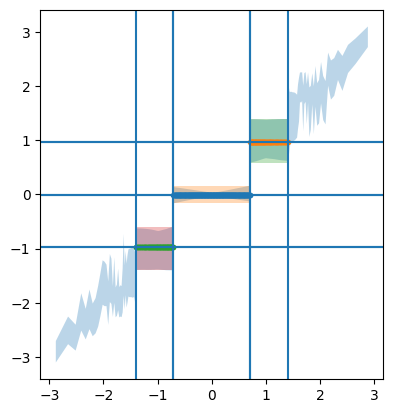

In [25]:
plt.fill_between(omega, np.min(d_region[:, arg], axis=0), np.max(
    d_region[:, arg], axis=0), alpha=0.3)

for i, c in enumerate(cluster):
    c = np.sort(c)
    if i == 0:
        mean_o = np.mean(omega[c])
        mean_p = np.mean(a_dtheta[c])
    plt.plot(omega[c], a_dtheta[c], '.')
    plt.axvline(omega[c[0]])
    plt.fill_between([np.min(omega[c]), np.max(omega[c])], np.min(
        d_region[:, c]), np.max(d_region[:, c]), alpha=0.3)
    plt.axhline(a_dtheta[c[0]])

    plt.axhline(a_dtheta[c[-1]])
    plt.axvline(omega[c[-1]])
plt.gca().set_aspect('equal')

In [155]:
I, J = np.meshgrid(avg_dtheta[-1], avg_dtheta[-1])
A = I-J

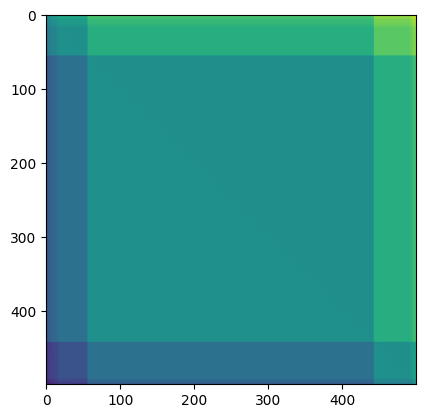

In [17]:
plt.imshow(A)

In [18]:
w, v = np.linalg.eig(A)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


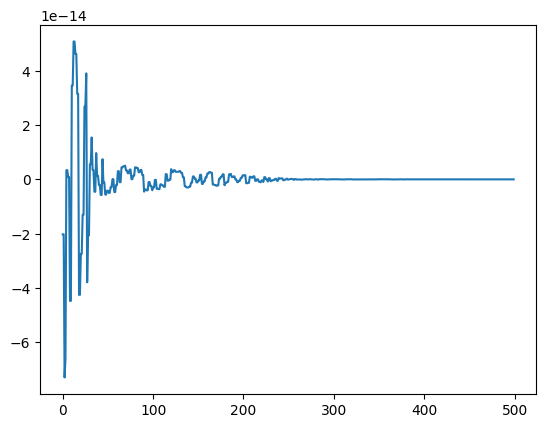

In [19]:
plt.plot(w)

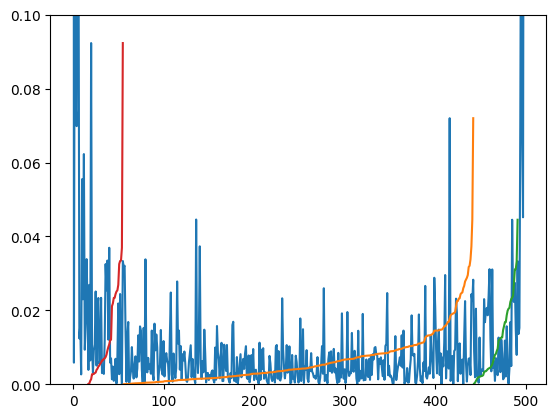

In [47]:
plt.plot(np.diff(omega))
plt.ylim(0, 0.1)

for c in cluster:
    plt.plot(np.sort(c), np.sort(np.diff(omega)[c]))
    plt.ylim(0, 0.1)

In [48]:
count, hist = np.histogram(omega, bins=20)

In [81]:
plt.hist([omega, qomega], bins=20, density=True)

NameError: name 'qomega' is not defined

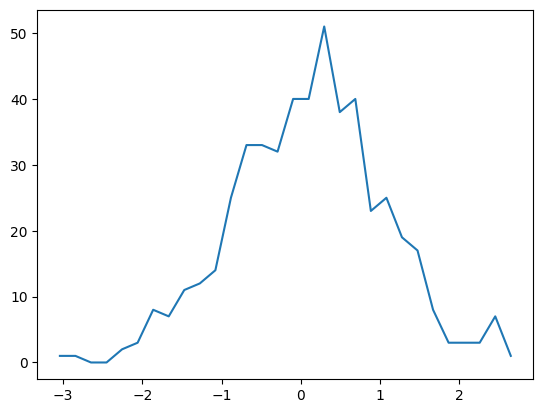

In [21]:
plt.plot(hist[1:], count)

## 09/19 cluster detection with other state $\Omega$

In [2]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2

from TO_sim.get_cluster import C_rsmso, cluster_os, C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r

max_c = 3e-4

In [99]:
m = 2
# m_set = np.arange(0.1,10+0.1/2,0.2).reshape(-1,1)
K = 4
seed = 100
N = 5000
theta_init, omega, Kc = Normal(N, 0, 1, seed=seed)
N_set = 50
omega = np.sort(omega) - np.mean(omega)
theta_sets = (np.ones((N_set, 1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets_temp = (np.ones((N_set, 1))*np.zeros_like(omega))

for i in range(N_set):
    theta_init, omega, Kc = Normal(N, 0, 1, seed=i)
    omega = np.sort(omega) - np.mean(omega)
    omega_sets_temp[i] = omega
omega_sets = omega_sets_temp

# m = 10
t_end = 5000
dt = 0.1
t = np.arange(0, t_end, dt)
theta_set, dtheta_set, rs = mf2_sets_TLO(m_set=m, N=N, K=K, t_array=t, p_theta=theta_sets,
                                         p_dtheta=0*omega_sets, p_omega=omega_sets, result_time=int((t_end-350)*(1/dt)))

In [100]:
rs_ = rs.T[0].T

In [101]:
sum_time = 2000
r_mean = np.array([np.mean(rs_[i:i+sum_time], axis=0)
                  for i in range(len(t)-sum_time)])
r_std = np.array([np.std(rs_[i:i+sum_time], axis=0)
                 for i in range(len(t)-sum_time)])
dtheta_c = np.cumsum(dtheta_set, axis=0)
avg_dtheta_set = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

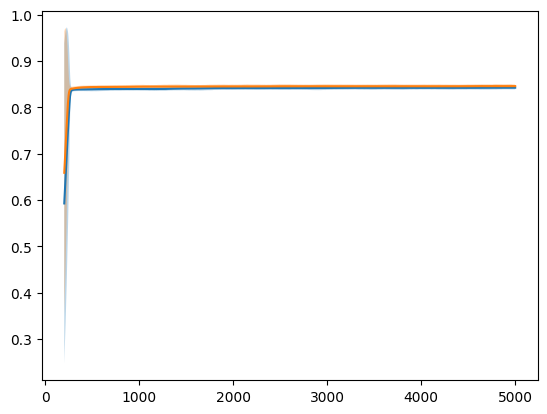

In [102]:
plt.plot(t[sum_time:], r_mean[:, 7:9])
for i in range(7, 9, 1):
    plt.fill_between(t[sum_time:], (r_mean-r_std)[:, i],
                     (r_mean+r_std)[:, i], alpha=0.3)

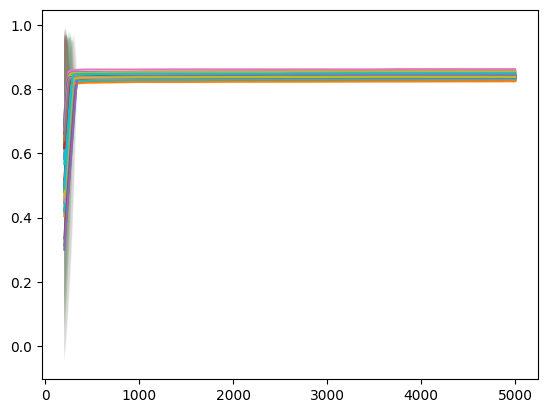

In [103]:
plt.plot(t[sum_time:], r_mean)
for i in range(N_set):
    plt.fill_between(t[sum_time:], (r_mean-r_std)[:, i],
                     (r_mean+r_std)[:, i], alpha=0.1)

In [104]:
dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
CSO_set = []
check_set = []
cluster_set = []
Is_group_set = []
c_threshold = np.where(r_mean < 0.1, 1e-4, 3e-4)
error_set = []
# Ks =K_set.reshape(-1)
for i in range(N_set):
    AVG = avg_dtheta_set[-1500:, i]
    c_check = c_threshold[i]
    CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
        AVG, height=1e-2, c_std=3, check=3e-4, c_size=5, N=500, omega=omega_sets[i])

    CSO = np.array([(S, O) for S, O in zip(CS, CMP)], dtype=dtype)
    CSO_set.append(CSO)

print(error_set)

[]


In [105]:
C_0 = []
C_1 = []
C_2 = []

for i in range(N_set):
    A = CSO_set[i]['cluster size']
    if len(A) >= 3:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(A[2])

    if len(A) == 2:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(0)
    elif len(A) == 1:
        C_0.append(A[0])
        C_1.append(0)
        C_2.append(0)
    elif len(A) == 0:
        C_0.append(0)
        C_1.append(0)
        C_2.append(0)

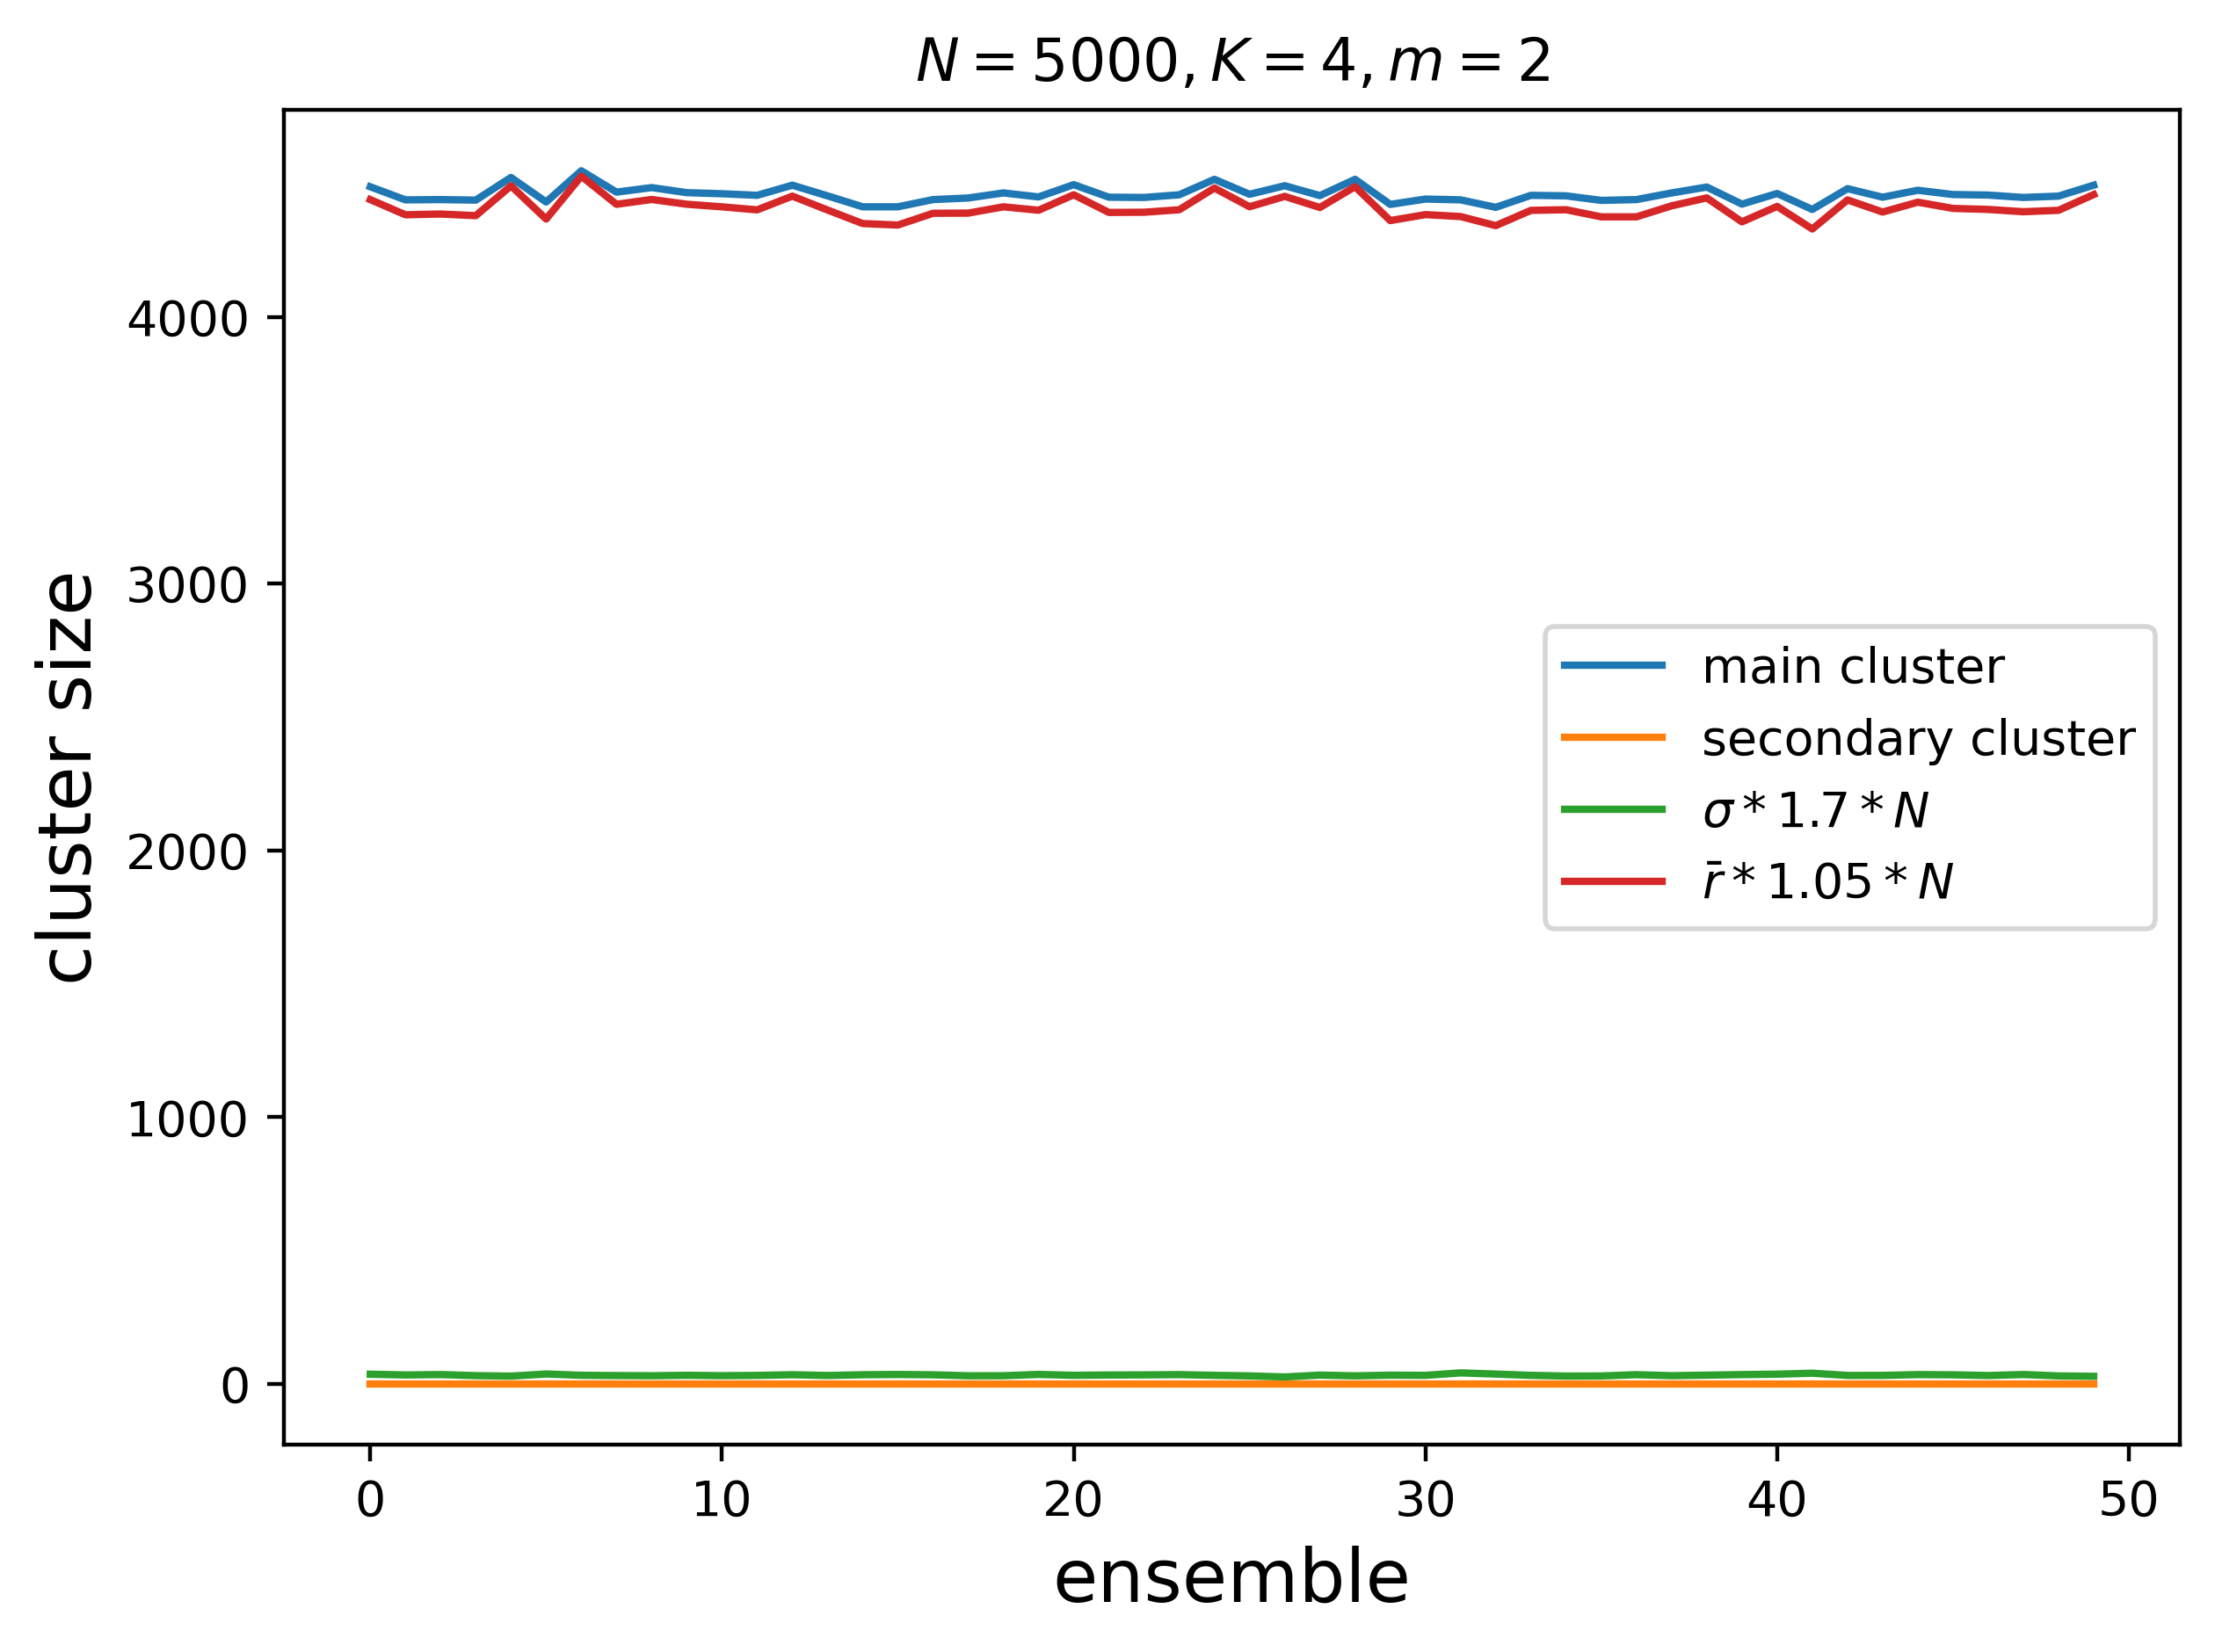

In [106]:
plt.figure(dpi=400)
plt.plot(np.array(C_0), label='main cluster')
plt.plot(np.array(C_1) + np.array(C_2), label='secondary cluster')
# plt.plot(np.array(C_2))
plt.plot(r_std[-1]*1.70*N, label=r'$\sigma*1.7*N$')
plt.plot(r_mean[-1]*1.05*N, label=r'$\bar{r}*1.05*N$')
plt.legend()
plt.ylabel('cluster size', fontsize=15)
plt.xlabel('ensemble', fontsize=15)
plt.title(rf'$N = {N}, K = {K}, m = {m}$')
plt.tight_layout()
plt.show()

In [122]:
1.08**10

2.158924997272788

(-2.0, 2.0)

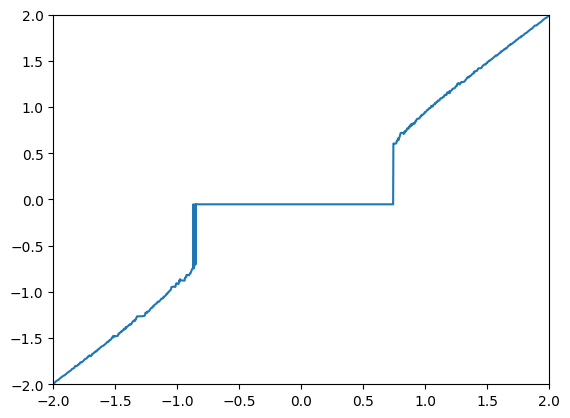

In [144]:
plt.plot(omega_sets[8].T, avg_dtheta_set[-1, 8].T)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

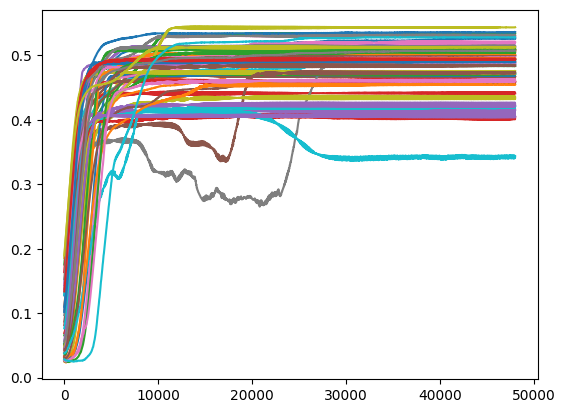

In [145]:
plt.plot(r_mean)

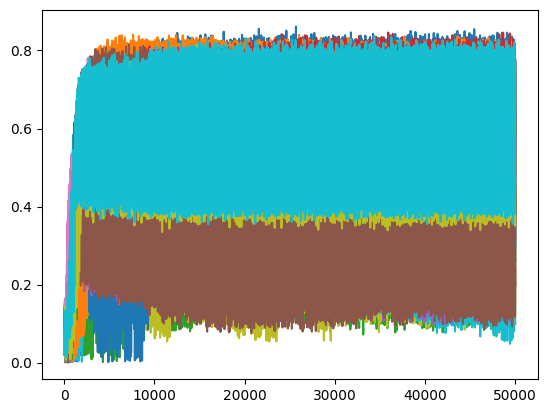

In [50]:
plt.plot(rs_)

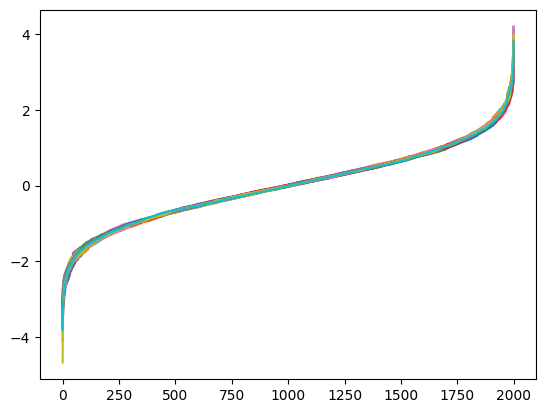

In [146]:
plt.plot(omega_sets_temp.T)

In [ ]:
for i in range(N_set):

In [4]:
omega_sets

(100, 500)

In [ ]:
seed = 10
N = 8000
theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
t = np.arange(0, 9000, 0.1)
K = 6
sum_time = 1500
theta, dtheta, rs = mf2(K, N=N, m=m, t_array=t,
                        p_theta=theta_random, p_dtheta=omega, p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]
dtheta_c = np.cumsum(dtheta, axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)
multi = 1.5
CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=1e-2, c_std=3, check=3e-4, c_size=5, N=500, omega=omega)

In [ ]:
CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=1e-2, c_std=3, check=3e-4, c_size=5, N=500, omega=omega)

## Secondary clsuter visualization

In [6]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks,stft
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [365]:
seed = 10
N = 2000
theta_random, omega, Kc = Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
t = np.arange(0, 9000, 0.1)
K = 6
sum_time = 1500
theta, dtheta, rs = mf2(K, N=N, m=m, t_array=t,
                        p_theta=theta_random, p_dtheta=0*omega, p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]

dtheta_c = np.cumsum(dtheta, axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)
multi = 1.5

In [366]:
CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=5e-3, c_std=3, check=1e-4, c_size=5, N=500, omega=omega)
CS

array([1482,  161,  154,   26,   15])

### cluster

In [367]:
import matplotlib.colors as mcl

In [370]:
cluster

array([array([ 267,  273,  274, ..., 1755, 1757, 1762]),
       array([111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
              124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
              137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
              150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
              163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
              176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
              189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 272,
              271, 201, 270, 202, 203, 269, 204, 205, 268, 206, 266, 207, 265,
              264, 263, 208, 209, 210, 262, 261, 211, 260, 212, 259, 213, 258,
              214, 215, 257, 256, 255, 254, 253, 252, 216, 217, 251, 250, 218,
              249, 219, 220, 248, 247, 221, 246, 222, 245, 223, 244, 224, 243,
              242, 241, 240, 225, 239, 238, 237, 226, 236, 235, 234, 227, 

In [382]:
c0, c1, c2 = cluster[:3]

In [383]:
c0 = cluster[0]
# c1 = []
# c2 = []
CLU = np.concatenate([c0, c1, c2])
not_CLU = np.setdiff1d(np.arange(N), CLU)

In [384]:
seg_theta = theta[:5000]
seg_dtheta = dtheta[:5000]
seg_time = t[:5000]
seg_r = rs[:5000]

In [385]:
rpsi = 1/N * np.sum(np.exp(1j*seg_theta), axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
n_dtheta = seg_dtheta / np.max(abs(seg_dtheta))


def time_oscillator(i, theta=seg_theta, dtheta=seg_dtheta):
    norm = n_dtheta[i]
    A = (1 + (norm)/2)
    theta_ = theta[i] - psi[i]
    sin, cos = A*np.sin(theta_+np.pi/2), A*np.cos(theta_+np.pi/2)

    return cos, sin, norm, np.cos(theta_+np.pi/2), np.sin(theta_+np.pi/2)

In [386]:
c_ = np.linspace(-np.pi, np.pi, 1000)
circle = {
    'x': np.cos(c_), 'y': np.sin(c_)
}

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_72398/3507859052.py:71: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(212)


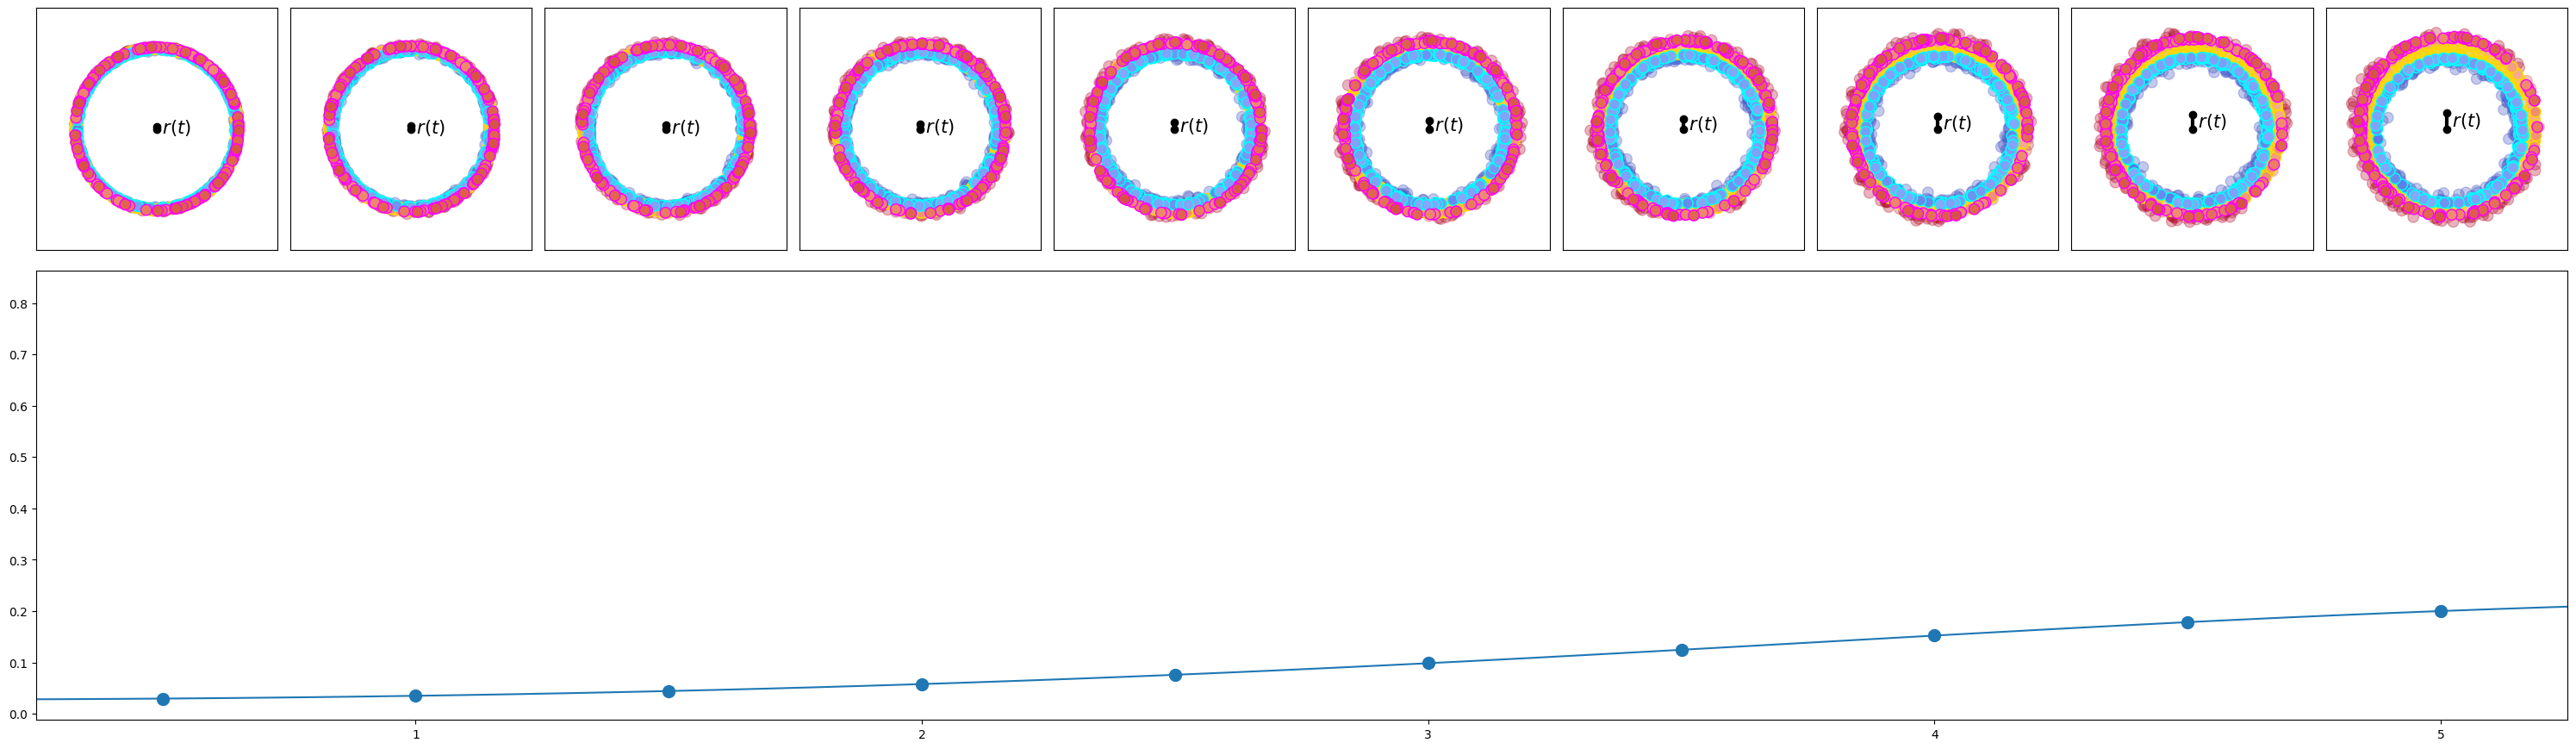

In [387]:
i = -1
fig, axs = plt.subplots(ncols=10, nrows=2, figsize=(
    5*6, 10), dpi=100, facecolor=(1, 1, 1, 1))


def Make_theta(ax, i):
    plt.sca(ax)
    # colors = ['gold','darkslateblue','darkred']
    colors = ['gold', 'aqua', 'fuchsia']

    X, Y, C_, x, y = time_oscillator(i)
    ax.plot([0, np.mean(x)], [0, np.mean(y)],
            color='black', lw=3, marker='o', zorder=3)
    ax.text(np.mean(x)/2, np.mean(y)/2, ' '+r'$r(t)$',
            horizontalalignment='left', verticalalignment='center', fontsize=15)
    cmap = 'coolwarm'  # 'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X[not_CLU], 'y': Y[not_CLU],
        'c': omega[not_CLU], 's': 80, 'vmax': 2, 'vmin': -2, 'alpha': 0.3,
        'cmap': cmap,
        # 'c': colors,#ome"ga,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data, zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    for clu, color in zip([c0, c1, c2], colors):
        if len(clu) != 0:
            data = {
                'x': X[clu], 'y': Y[clu],
                'c': omega[clu], 'cmap': cmap,
                'edgecolor': (*mcl.to_rgb(color), alpha), 'linewidth': 1, 's': 80, 'vmax': 2, 'vmin': -2}
            cax = ax.scatter(**data, zorder=1)

    ax.plot(np.cos(c_), np.sin(c_), zorder=0,
            color=plt.cm.coolwarm(0.5), lw=3, ls='--')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    # ax.axis('off')

    ax.set_xticks([])
    ax.set_yticks([])
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
    plt.tight_layout()
    # ax = plt.gca()
    plt.gca().set_aspect('equal')
    # cbar.ax.plot([0,1],[1]*2,'w')
    # for clu,color in zip([c0,c1,c2],colors):

    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return cax


num = 0
for ax in axs[0]:
    num += 5
    cax = Make_theta(ax, num)

# p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.353))
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)
# cbar = plt.colorbar(cax,ax=axs,extend='both',shrink = 0.1,orientation='horizontal',location='bottom',pad=0.01)
# cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)
# for clu,color in zip([c0,c1,c2],colors):

#         if len(clu)!=0:
#         min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
#         cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
#         cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
#         cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
#         cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
# p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
# p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
# p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)
plt.subplot(212)
plt.plot(seg_time, seg_r)
num = 0
for ax in axs[0]:
    num += 5
    plt.scatter(seg_time[num], seg_r[num], color='tab:blue', s=100)
plt.xlim(seg_time[0]+0.25, seg_time[num]+0.25)
# num = 100
plt.tight_layout()
# for ax in axs[0]:
#     num+= 5
#     plt.scatter(set_time[num],rs[-1000:][num])
# cax = Make_theta(ax,num)

In [388]:
def O_p(Kr, m=m): return (4/np.pi)*np.sqrt(Kr/m)


def r_p(O, K=K, m=m): return (np.pi/4)**2*m/K*O

In [389]:
seg_time.shape
seg_r.shape

(5000,)

In [390]:
K*seg_r.shape

(5000, 5000, 5000, 5000, 5000, 5000)

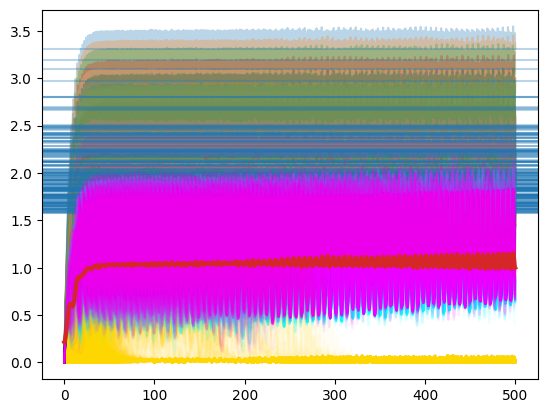

In [392]:
i = 0
for c in cluster[:3]:
    plt.plot(seg_time, abs(seg_dtheta[:, c]),
             zorder=3, color=colors[i], alpha=0.05)
    # plt.plot(seg_time,abs(omega[c]),*np.ones_like(seg_time),zorder=3,color = colors[i],alpha=0.05)

    i += 1

# plt.plot(seg_time,seg_dtheta[:,not_CLU],alpha=0.3);
# plt.plot(seg_time,abs(seg_dtheta[:,not_CLU]),alpha=0.3);
plt.plot(seg_time, abs(seg_dtheta[:, not_CLU]), alpha=0.3)
plt.plot(seg_time, O_p(K*seg_r, m=m), zorder=4, lw=3)
# i = 0
# for c in cluster:
#     for num in c:
#         plt.axhline(abs(omega[num]),color= colors[i])
#     i+=1


for num in not_CLU:
    plt.axhline(abs(omega[num]), alpha=0.3)
# i+=1

### 시간에 따른 클러스터 수 구하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian

In [2]:
seed = 10
N = 500
theta_random, omega, Kc = Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
K = 3.9
t = np.arange(0, 15000, 0.1)
theta, dtheta, rs = mf2(K, N=N, m=m, t_array=t,
                        p_theta=theta_random, p_dtheta=0*omega, p_omega=omega)
sum_time = 2000
dtheta_c = np.cumsum(dtheta, axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)

CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=1e-2, c_std=3, check=1e-4, c_size=5, N=500, omega=omega)
CS

array([287,  77,  57])

In [13]:
CS__, CMP, cluster__, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=1e-2, c_std=3, check=1e-4, c_size=5, N=500, omega=omega)
CS__

array([658, 117, 114])

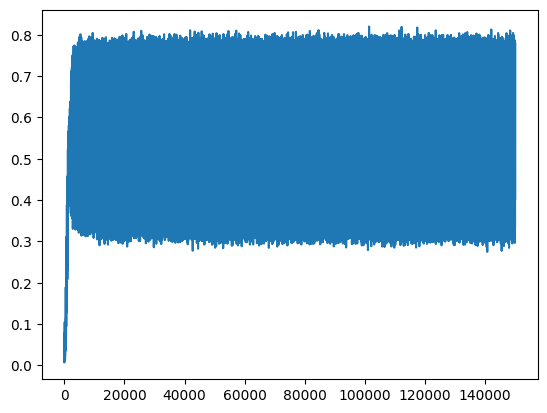

In [44]:
plt.plot(rs)

In [15]:
CS/N

array([0.658, 0.117, 0.114])

In [16]:
np.std(rs[-1500:])*1.8

0.2689951107561862

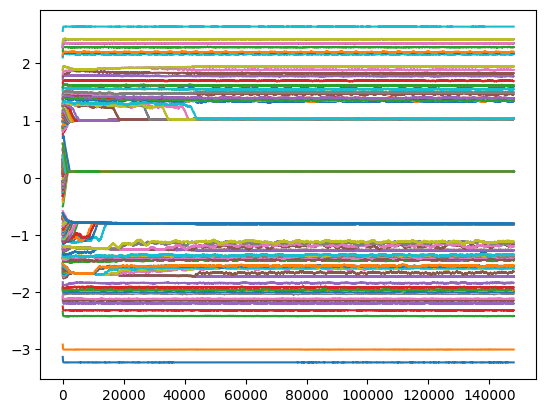

In [45]:
plt.plot(avg_dtheta)

In [18]:
CS

array([658, 117, 114])

In [3]:
sum_time = 500
r_mean = np.array([np.mean(rs[i:i+sum_time], axis=0)
                  for i in range(len(t)-sum_time)])
r_std = np.array([np.std(rs[i:i+sum_time], axis=0)
                 for i in range(len(t)-sum_time)])

In [4]:
CLU = np.concatenate([*cluster])
not_CLU = np.setdiff1d(np.arange(N), CLU)

In [7]:
temp = 1/N*np.sum(np.exp(1j*theta[:, cluster[0]]), axis=1)
temp1 = 1/N*np.sum(np.exp(1j*theta[:, cluster[1]]), axis=1)
temp2 = 1/N*np.sum(np.exp(1j*theta[:, cluster[2]]), axis=1)
# temp3 = 1/N*np.sum(np.exp(1j*theta[:,cluster[3]]),axis=1)
# temp_ = 1/N*np.sum(np.exp(1j*theta[:,cluster[1]-5]),axis=1)


temp_clu = 1/N*np.sum(np.exp(1j*theta[:, CLU]), axis=1)
temp_nclu = 1/N*np.sum(np.exp(1j*theta[:, not_CLU]), axis=1)

In [5]:
r0_s = []
r0_stds = []
for i in range(-25, 25):
    r_0 = abs(1/N*np.sum(np.exp(1j*theta[:, cluster[1]+i]), axis=1))

    r0_mean = np.array([np.mean(r_0[i:i+sum_time], axis=0)
                       for i in range(len(t)-sum_time)])
    r0_std = np.array([np.std(r_0[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])
    r0_s.append(r0_mean)
    r0_stds.append(r0_std)
    # plt.plot(t,,alpha=0.3)

# temp_1 = 1/N*np.sum(np.exp(1j*theta[:,cluster[1]-2]),axis=1)
# temp_2 = 1/N*np.sum(np.exp(1j*theta[:,cluster[1]+2]),axis=1)

# plt.plot(t,abs(temp_0),alpha=0.3)
# plt.plot(t,abs(temp_1),alpha=0.3)
# plt.plot(t,abs(temp_2),alpha=0.3)

In [23]:
r0_stds = np.array(r0_stds)
r0_s = np.array(r0_s)

In [24]:
r0_stds.shape

(50, 149500)

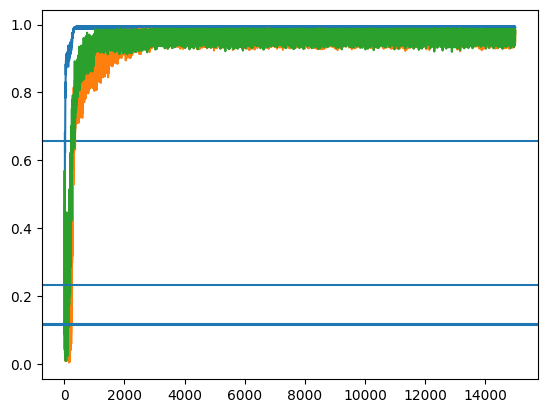

In [25]:
plt.plot(t, abs(temp))
plt.axhline((CS[0])/N)

# plt.twinx()
plt.plot(t, abs(temp1))
plt.plot(t, abs(temp2))
# plt.plot(t,abs(temp2)+abs(temp1))

plt.axhline((CS[1]+CS[2])/N)
plt.axhline((CS[1])/N)
plt.axhline((CS[2])/N)
# plt.plot(t,abs(temp3)+abs(temp2)+abs(temp1))
# plt.plot(t,abs(temp3))
# plt.plot(t,abs(temp_clu))
# plt.plot(t,abs(temp_nclu))
# plt.plot(t[sum_time:],r_mean)
# plt.plot(t[sum_time:],r_std*1.66)
# plt.xscale('log')

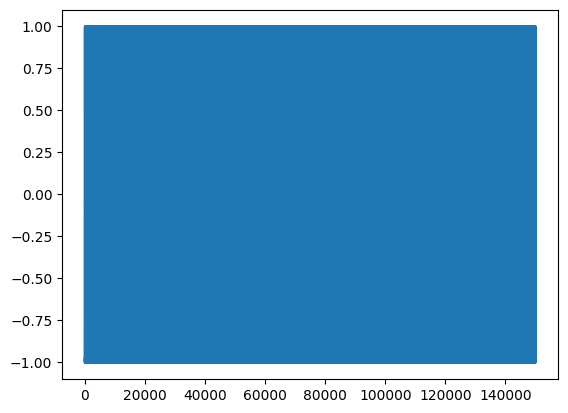

In [10]:
plt.plot(np.cos(np.angle(temp1)-np.angle(temp)))

In [13]:
np.mean(np.sin(np.angle(temp1)-np.angle(temp))[-25000:])

-0.027507703367577224

(500.0, 550.0)

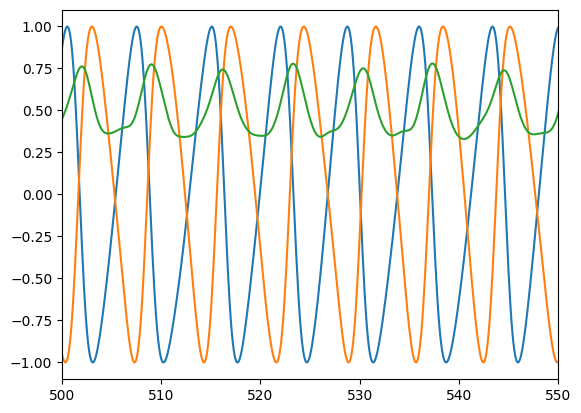

In [9]:
# plt.plot(t,np.sin(np.angle(temp)))
plt.plot(t, np.sin(np.angle(temp1)-np.angle(temp)))
plt.plot(t, np.sin(np.angle(temp2)-np.angle(temp)))
# plt.plot(t,np.sin(np.angle(temp3)))

plt.plot(t, rs)

# plt.plot(t,(np.angle(temp2)+np.angle(temp1)))
# plt.axhline(64)
plt.xlim(500, 550)

In [54]:
temp = 1/N*np.sum(np.exp(1j*theta[:, cluster[0]]), axis=1)
temp1 = 1/N*np.sum(np.exp(1j*theta[:, cluster[1]]), axis=1)
temp2 = 1/N*np.sum(np.exp(1j*theta[:, cluster[2]]), axis=1)
# temp3 = 1/N*np.sum(np.exp(1j*theta[:,cluster[3]]),axis=1)
# temp_ = 1/N*np.sum(np.exp(1j*theta[:,cluster[1]-5]),axis=1)


temp_clu = 1/N*np.sum(np.exp(1j*theta[:, CLU]), axis=1)
temp_nclu = 1/N*np.sum(np.exp(1j*theta[:, not_CLU]), axis=1)

r1 = abs(temp)
r2 = abs(temp1)
r3 = abs(temp2)


psi1 = np.angle(temp)
psi2 = np.angle(temp1)
psi3 = np.angle(temp2)
# r4 = abs(temp3)

r_clu = abs(temp_clu)
r_nclu = abs(temp_nclu)

In [28]:
sum_time = 500
r1_mean = np.array([np.mean(r1[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
r1_std = np.array([np.std(r1[i:i+sum_time], axis=0)
                  for i in range(len(t)-sum_time)])


r2_mean = np.array([np.mean(r2[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
r2_std = np.array([np.std(r2[i:i+sum_time], axis=0)
                  for i in range(len(t)-sum_time)])

r3_mean = np.array([np.mean(r3[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
r3_std = np.array([np.std(r3[i:i+sum_time], axis=0)
                  for i in range(len(t)-sum_time)])

# r4_mean = np.array([np.mean(r4[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
# r4_std = np.array([np.std(r4[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])


r_clu_mean = np.array([np.mean(r_clu[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])
r_clu_std = np.array([np.std(r_clu[i:i+sum_time], axis=0)
                     for i in range(len(t)-sum_time)])

r_nclu_mean = np.array([np.mean(r_nclu[i:i+sum_time], axis=0)
                       for i in range(len(t)-sum_time)])
r_nclu_std = np.array([np.std(r_nclu[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

(10000.0, 10500.0)

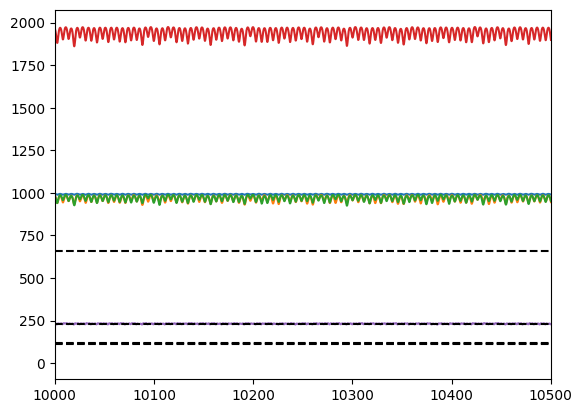

In [29]:
plt.plot(t, r1*N)
plt.plot(t, r2*N)
plt.plot(t, r3*N)
plt.plot(t, (r2+r3)*N)
plt.plot(t[sum_time:], r_std*1.55*N)
# plt.plot(t,(r2+r3+r4)*N)
# plt.plot(t,(r_nclu)*N)
plt.axhline(CS[0], ls='--', color='black')
plt.axhline(CS[1], ls='--', color='black')
plt.axhline(CS[2], ls='--', color='black')
plt.axhline(CS[2]+CS[1], ls='--', color='black')

plt.xlim(10000, 10500)
# plt.axhli

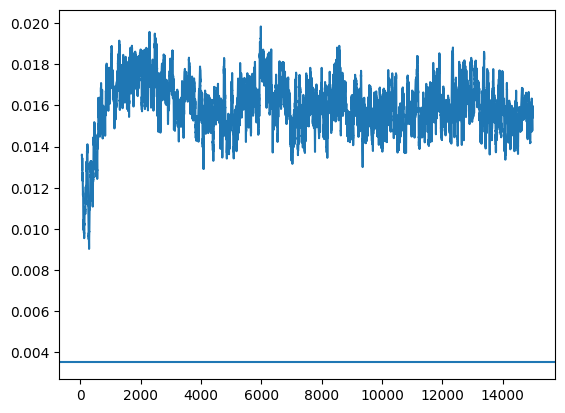

In [30]:
# plt.plot(t,(r_nclu))
plt.plot(t[sum_time:], (r_nclu_mean))
plt.axhline(1/np.sqrt(N)*len(not_CLU)/N)

In [31]:
CS/N

array([0.658, 0.117, 0.114])

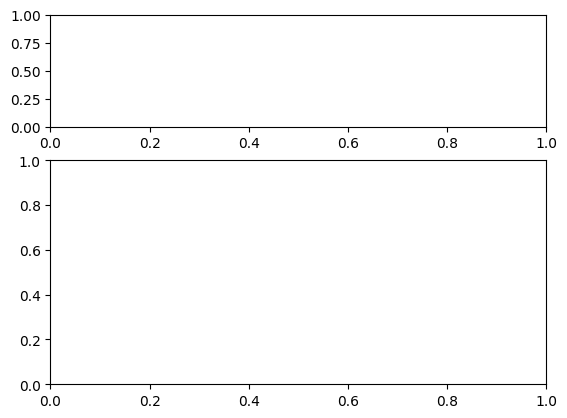

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2])

In [33]:
avg_dtheta.shape

(148000, 1000)

In [34]:
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

NameError: name 'r1_mean' is not defined

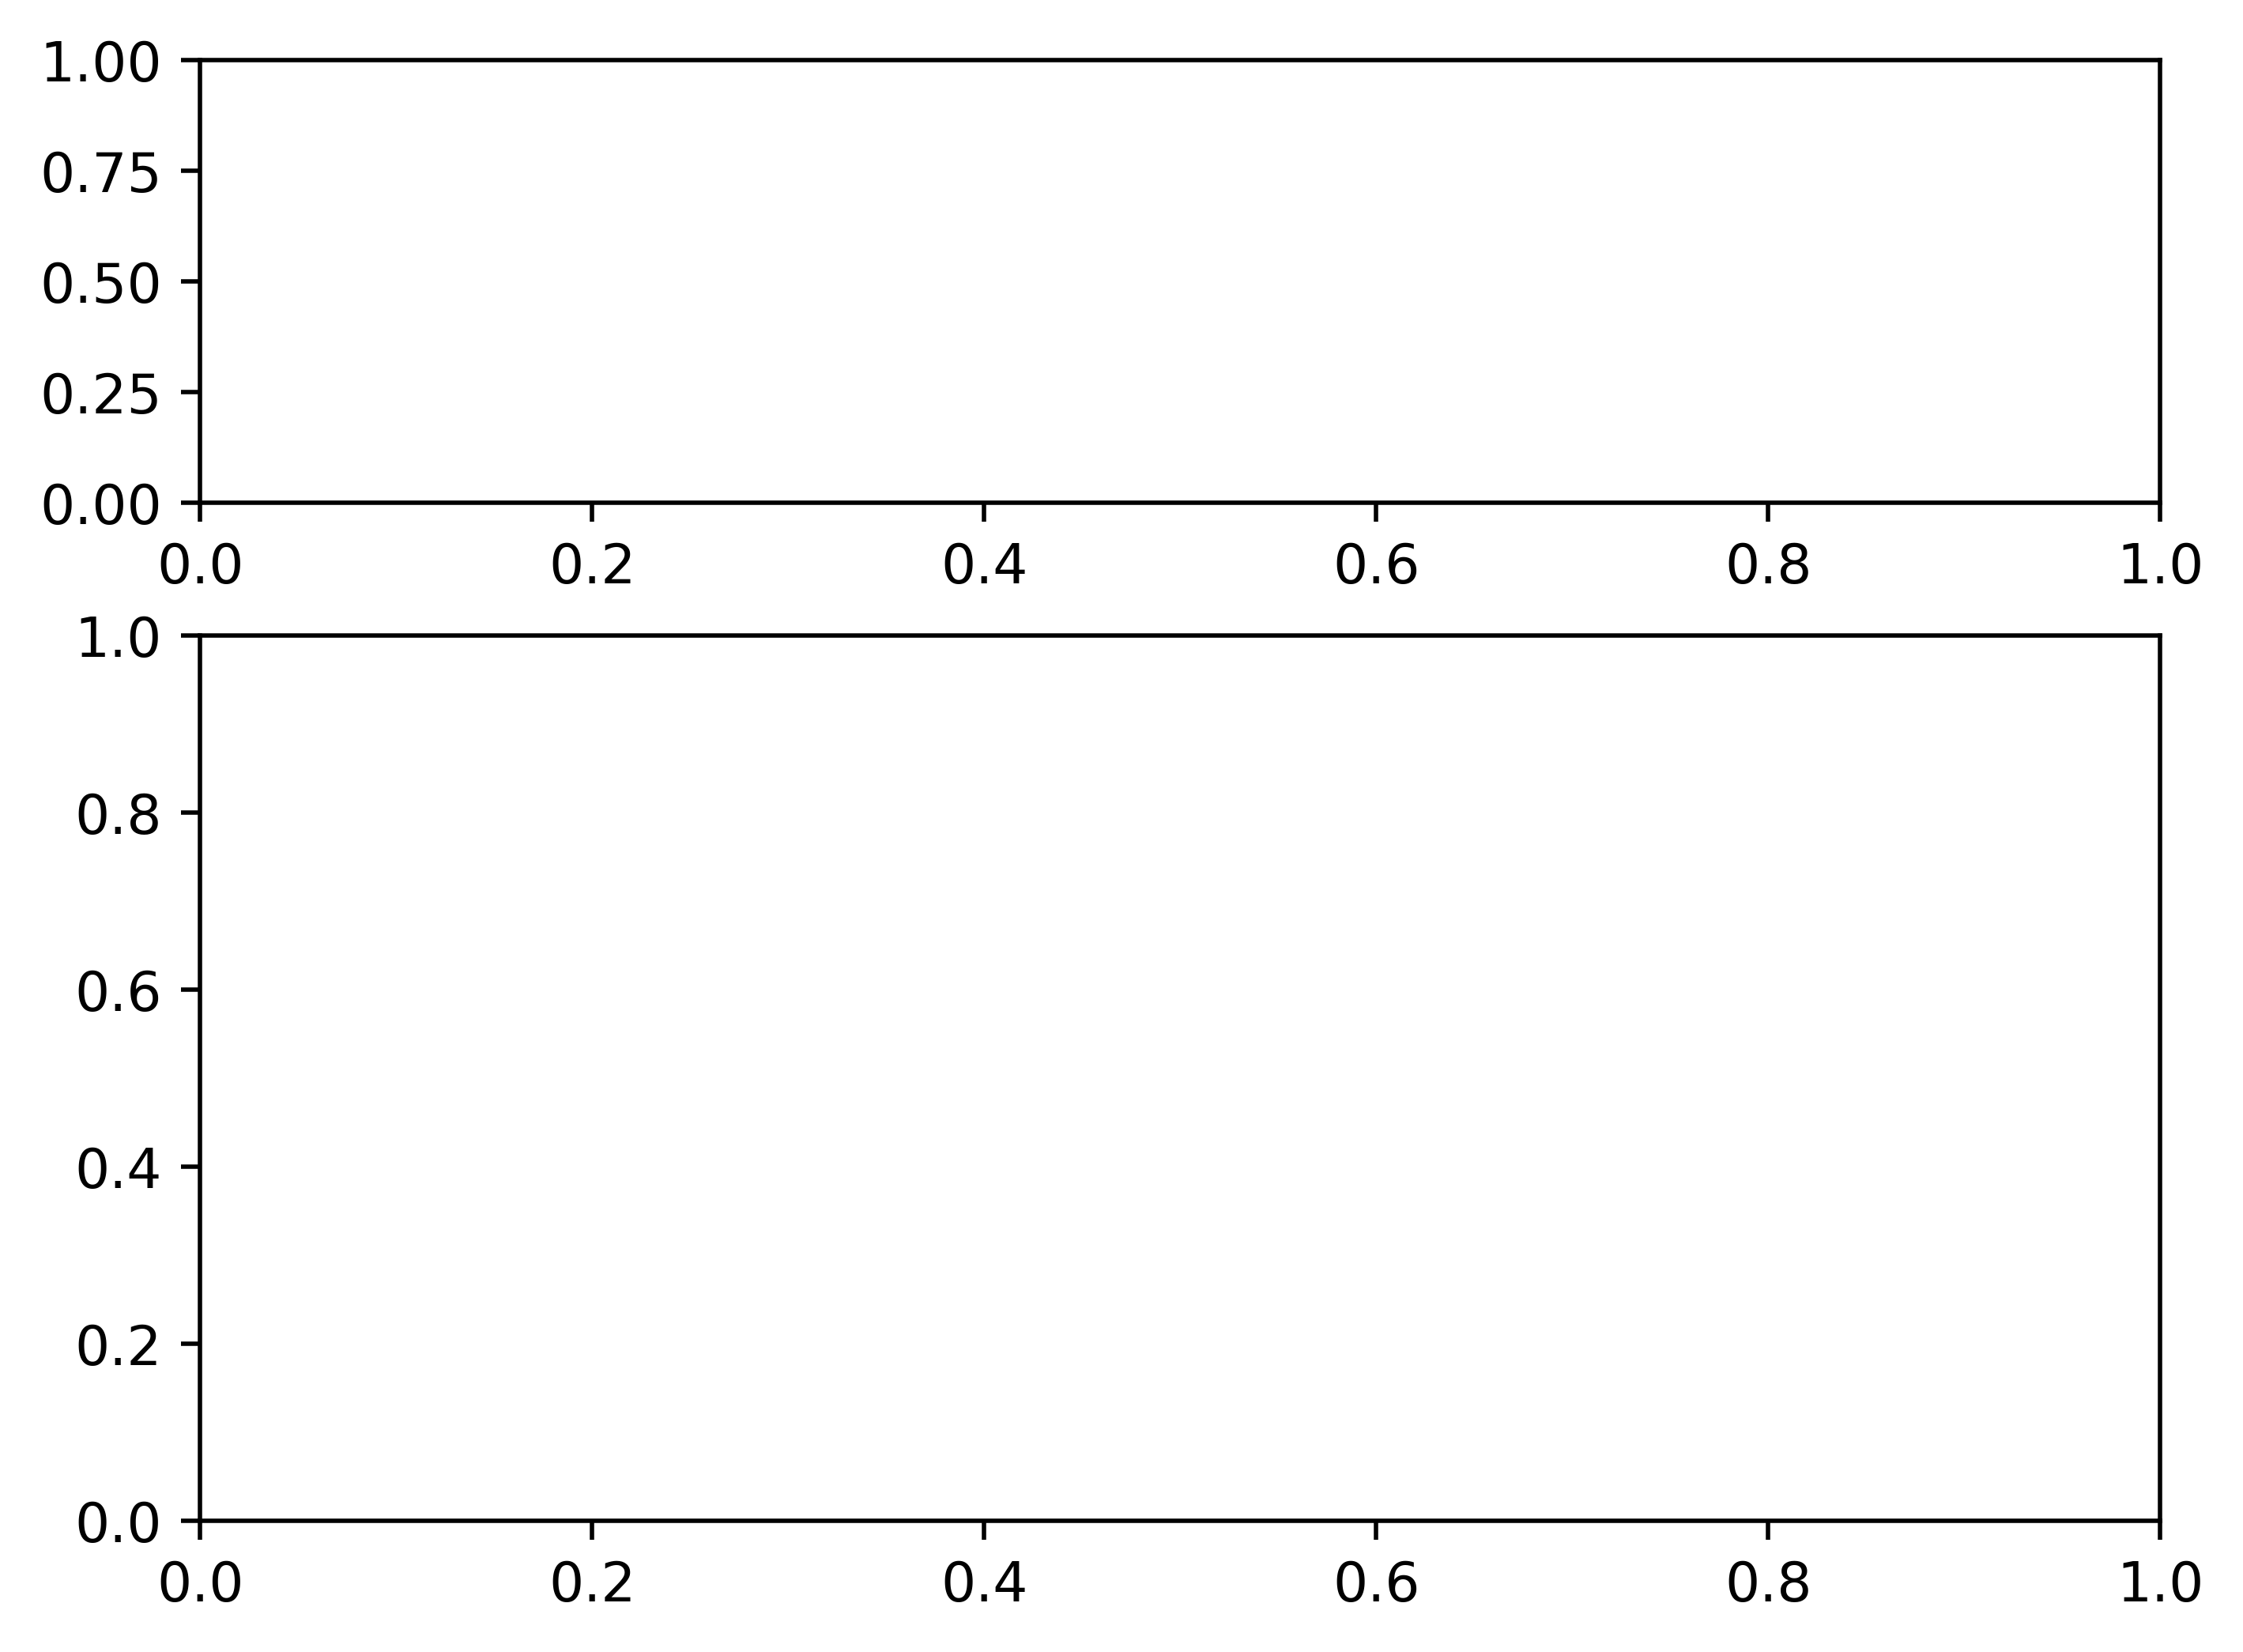

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
plt.sca(ax1)
plt.plot(t[sum_time:], r1_mean, label='Main cluster', color='black')
# plt.plot(t[sum_time:],r_clu_mean)
# plt.plot(t[sum_time:],r_mean)

# plt.axhline(CS[0]/N,ls='--',color='black')
# plt.twinx()
# plt.axhline(CS[1]/N,ls='--',color='black')
# plt.axhline(CS[2]/N,ls='--',color='black')
# plt.axhline(np.sum(CS[1:3])/N,ls='--',color='black')
plt.plot(t[sum_time:], r2_mean, label='secondary cluster(+)')
plt.plot(t[sum_time:], r3_mean, label='secondary cluster(-)')
plt.grid()
# plt.plot(t[sum_time:],r4_mean)
# plt.plot(t[sum_time:],r_nclu_mean)
# plt.plot(t[sum_time:],(r2_mean+r3_mean),label='secondary cluster')
plt.legend()
# plt.legend(loc=3)
plt.xlim(0, 4000)
plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)

plt.sca(ax2)
ls = plt.plot(t[sum_time:], avg_dtheta, lw=1)
color = plt.cm.viridis(np.linspace(0, 1, N, endpoint=True), alpha=0.3)
for l, c in zip(ls, color):
    l.set_color(c)

color0 = plt.cm.Greys(np.linspace(0.7, 1.0, CS[0], endpoint=True))
color1 = plt.cm.Blues(np.linspace(0.3, 0.7, CS[1], endpoint=True))
color2 = plt.cm.Oranges_r(np.linspace(0.3, 0.7, CS[2], endpoint=True))
colors = [color0, color1, color2]
i = 0
for c in cluster[:3]:
    for l, c in zip(np.array(ls)[c], colors[i]):
        l.set_color(c)
    i += 1
plt.grid()
plt.xlim(0, 4000)
plt.ylabel('avg. angular vel.', fontsize=15)
plt.xlabel('time', fontsize=15)
plt.show()
# plt.plot(t[sum_time:],(r2_mean+r3_mean+r4_mean))
# plt.axhline(64,ls='--',color='black')
# plt.xlim(500,750)
# plt.axhli

(0.9, 1.0)

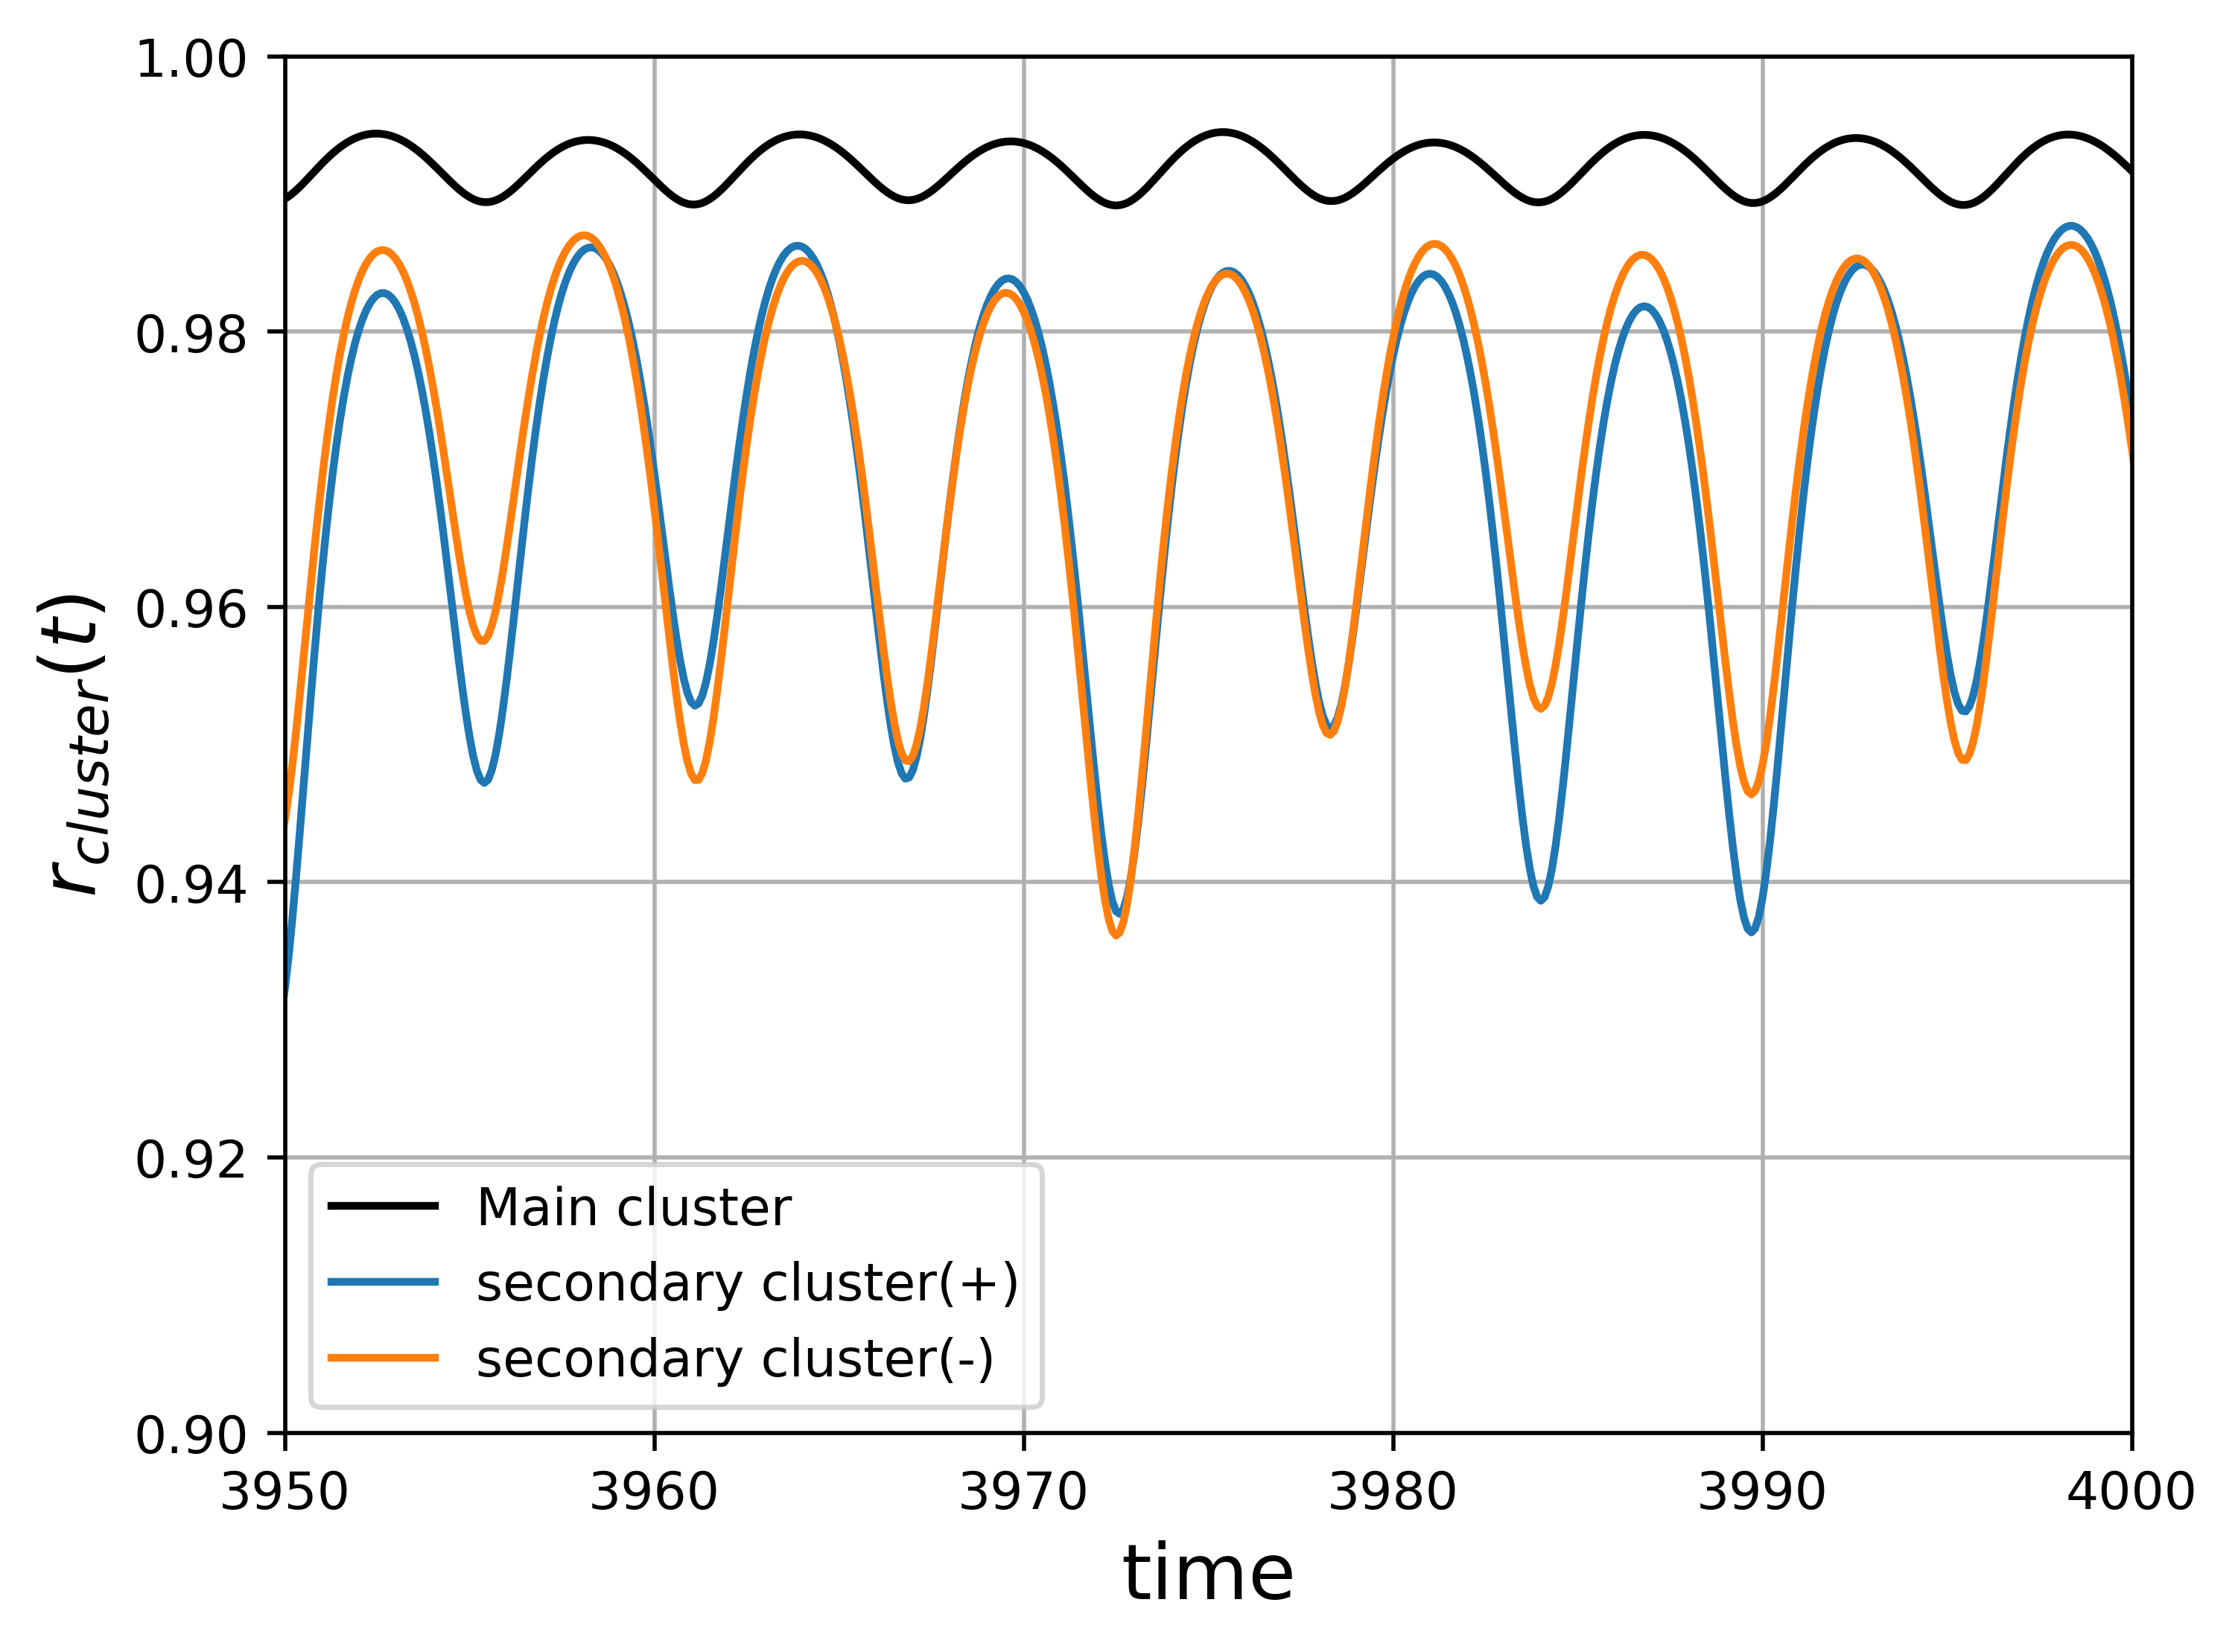

In [48]:
# fig, (ax1,ax2) = plt.subplots(2,1,height_ratios=[1, 2],dpi=500)
plt.figure(dpi=500)

plt.plot(t, r1, label='Main cluster', color='black')
plt.plot(t, r2, label='secondary cluster(+)')
plt.plot(t, r3, label='secondary cluster(-)')
plt.grid()
plt.legend()
# plt.legend(loc=3)
plt.xlim(3950, 4000)
plt.ylabel(r'$r_{cluster}(t)$', fontsize=15)
plt.xlabel('time', fontsize=15)
plt.ylim(0.90, 1.0)

Text(0, 0.5, '$r_{cluster}$')

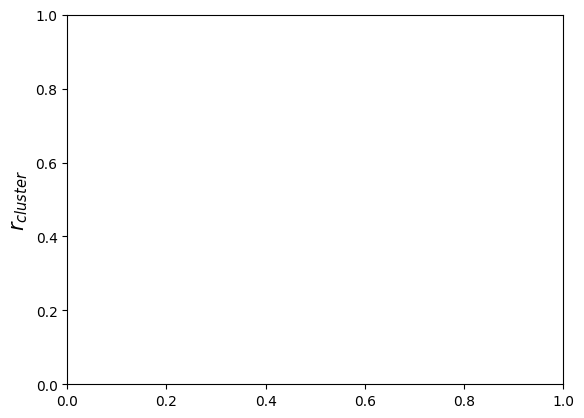

In [69]:
plt.ylabel(r'$r_{cluster}$', fontsize=15)

In [47]:

i = 0
for c in cluster[:3]:
    for c_ in c:
        ls[c_].set_color[colors[i]]
    i += 1

TypeError: 'method' object is not subscriptable

In [41]:
ls[*cluster[0]]

TypeError: list indices must be integers or slices, not tuple

(500.0, 750.0)

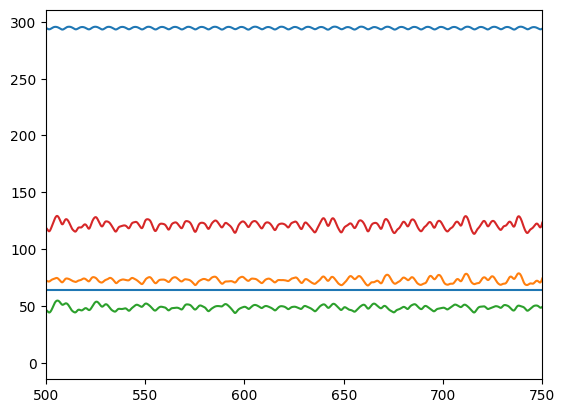

In [117]:
plt.plot(t, abs(temp)*N)
plt.plot(t, abs(temp1)*N)
plt.plot(t, abs(temp2)*N)
plt.plot(t, (abs(temp2)+abs(temp1))*N)
plt.axhline(64)
plt.xlim(500, 750)
# plt.axhli

In [96]:
np.sum(CS)

889

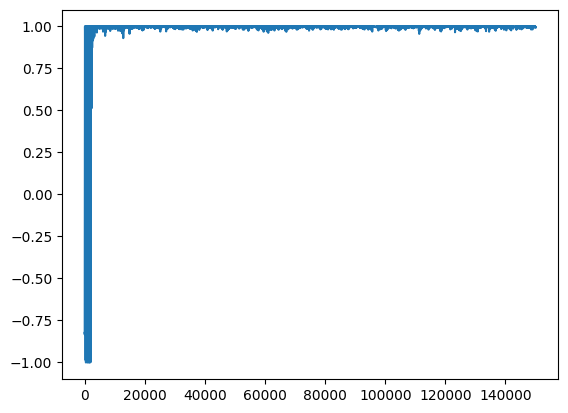

In [94]:
plt.plot(np.cos((psi2-psi1+psi3-psi1)))
# plt.xlim(4000,5000)

In [ ]:
plt.plot(t, abs(temp))
plt.plot(t, abs(temp))

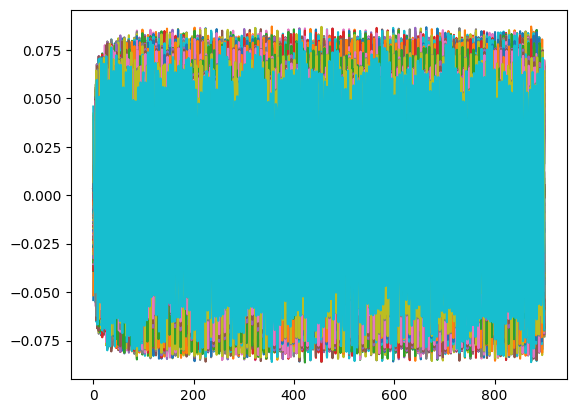

In [449]:
plt.plot(np.diff(dtheta, axis=0)[::100])
# plt.plot(np.diff(dtheta[-1]))

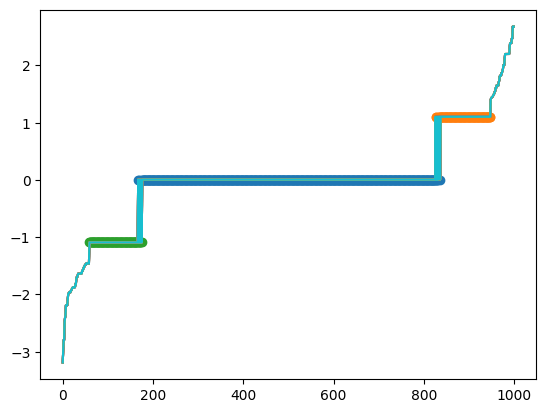

In [207]:
plt.plot(avg_dtheta[-10:].T)
for clu in cluster:
    plt.scatter(clu, avg_dtheta[-1, clu].T)

In [3]:
import numpy as np

In [4]:
1/np.zeros(10)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_86641/3462182693.py:1: RuntimeWarning: divide by zero encountered in divide
  1/np.zeros(10)


array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

# cluster의 평균 omega와, phase velocity

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
import TO_sim.Integrator_jit as IJ
RK4_jit = IJ.RK4

In [80]:
seed = 10
N = 500
theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
K = 4
dt = 0.1
t = np.arange(0, 10000+dt/2, dt)
Theta = np.zeros(2*N)
Theta[:N] = 0*theta_random 
Theta[N:] = omega
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t, args=(omega, N, m, K))
theta,dtheta = sol[:,:N],sol[:,N:2*N]
rs = np.abs(np.mean(np.exp(theta.T*1j),axis=0))
# theta, dtheta, rs = mf2(K, N=N, m=m, t_array=t,
#                         p_theta=theta_random, p_dtheta=omega, p_omega=omega)
# sum_time = 2000
if dt <0.1:
    t = t[::10]
    theta = theta[::10]
    dtheta = dtheta[::10]
    rs = rs[::10]

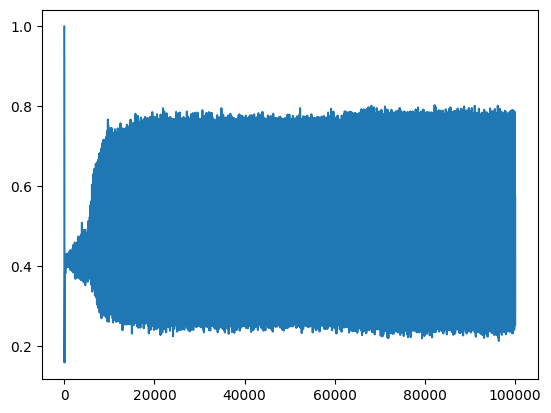

In [81]:
plt.plot(rs)

In [82]:
sum_time = 2000
dtheta_c = np.cumsum(dtheta[-4000:], axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)

CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=6e-4, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS

array([266])

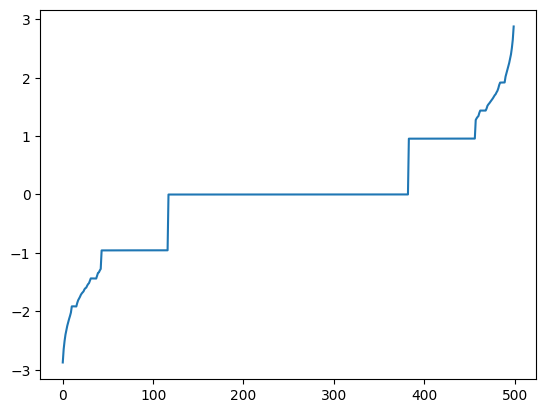

In [83]:
plt.plot(avg_dtheta[-1])

In [52]:
CS/N

array([0.767 , 0.0655, 0.0645])

In [53]:
rstd = np.std(rs[-5000:])
rmean = np.mean(rs[-5000:])
rmean

0.713433102515041

In [41]:
def A(r,K=K,m=m):
    return 1/np.sqrt(K*r*m)

def B(r,CS,CM,K=K,m=m):
    return (CS-CM)/(K*r)
def M_theta(r,CS,CM,K=K,m=m):
    a = A(r,K=K,m=m)
    b = B(r,CS,CM,K=K,m=m)
    return - a**2/(2*b**2)
# cm = np.mean(np.cos(psi_clu[1]-psi_clu[0])[-5000:])
M = M_theta(0.701007080078125,CMO[1],CMO[0])
print(cm,M)

NameError: name 'cm' is not defined

In [50]:
M = M_theta(0.701007080078125,CMO[1],CMO[0])

In [51]:
rstd/(2**0.5*(1-2*M**2))

0.058416585494623724

In [81]:
max(omega[cluster[1]])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [100]:
rmean

0.6210048531308685

In [174]:
omega[max(cluster[0])]

1.227696613346246

In [60]:
CS/N, CMP - CMP[0],CMP[0]

(array([0.767 , 0.0655, 0.0645]),
 array([ 0.        , -1.21972906,  1.21964965]),
 0.0013909651371016513)

Text(0.5, 1.0, '$K=6,m=5$')

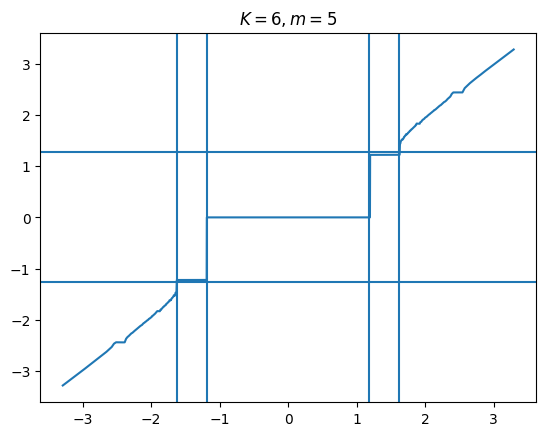

In [62]:
plt.plot(omega,avg_dtheta[-1]-CMP[0])
# plt.axvline(0.9956331146691427)
plt.axvline(1.185912798612868)
plt.axvline(-1.185912798612868)

plt.axvline(1.6226850994369393)
plt.axvline(-1.6226850994369393)

plt.axhline(1.2691485287178896)
plt.axhline(-1.2691485287178896)
# plt.axhline(1.185912798612868)
# plt.axvline(1.185912798612868)

# plt.axhline(1.6226850994369393)
plt.title(rf'$K={K},m={m}$')

In [19]:
CS/N

array([0.784])

In [31]:
CS/N

array([0.78])

In [5]:
CLU = np.concatenate([*cluster])
not_CLU = np.setdiff1d(np.arange(N), CLU)
not_main = np.setdiff1d(np.arange(N), cluster[0])

In [140]:
rs_clu = []
rs_clu_mean = []
rs_clu_std = []
psi_clu = []
sum_time = 1000
for clu in cluster:
    temp = 1/N*np.sum(np.exp(1j*theta[:, clu]), axis=1)
    rc = np.abs(temp)
    rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
    rc_std = np.array([np.std(rc[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

    psic = np.angle(temp)
    rs_clu.append(rc)
    rs_clu_mean.append(rc_mean)
    rs_clu_std.append(rc_std)
    psi_clu.append(psic)


temp_clu = 1/N*np.sum(np.exp(1j*theta[:, CLU]), axis=1)
temp_nclu = 1/N*np.sum(np.exp(1j*theta[:, not_CLU]), axis=1)

r_clu = abs(temp_clu)
r_nclu = abs(temp_nclu)

In [141]:
K,m, rs_clu_mean[0][-1],rs_clu_mean[1][-1],rs_clu_mean[2][-1]

(6, 6, 0.700773794399854, 0.09115931578553568, 0.09105264592763533)

In [123]:
CMO

[-0.0029641046870794606]

In [63]:
CS/N

array([0.596, 0.146, 0.141, 0.02 , 0.012])

In [62]:
rs_clu_mean[1][-1]

0.1415943085493377

In [12]:
np.array(rs_clu_mean)[:,-1] / (CS/N)

array([0.98557533, 0.93875483, 0.93910852])

In [15]:
a = np.mean(np.cos((psi_clu[1]-psi_clu[0])[-500:]))
b = np.mean(np.cos((psi_clu[2]-psi_clu[0])[-500:]))
a,b

(-0.1845205413786476, -0.1792405682650206)

In [8]:
def A(r,K=K,m=m):
    return 1/np.sqrt(K*r*m)

def B(r,CS,CM,K=K,m=m):
    return (CS-CM)/(K*r)
def M_theta(r,CS,CM,K=K,m=m):
    a = A(r,K=K,m=m)
    b = B(r,CS,CM,K=K,m=m)
    return - a**2/(2*b**2)
cm = np.mean(np.cos(psi_clu[1]-psi_clu[0])[-5000:])
M = M_theta(rs_clu_mean[0][-1],CMO[1],CMO[0])
print(cm,M)


-0.1806229399530883 -0.19031857725206788


In [9]:
a2 = np.mean(np.cos((psi_clu[1]-psi_clu[0])[-500:])**2)
b2 = np.mean(np.cos((psi_clu[2]-psi_clu[0])[-500:])**2)
a2,b2

(0.5247782086118157, 0.522713524342721)

In [10]:
names = []
for i in CMO:
    ro = i-CMO[0]
    if ro==0:names.append('Main cluster')
    elif ro<0:names.append(r'secondary cluster$(-)$')
    else:names.append(r'secondary cluster$(+)$')

In [11]:
sum_time = 1000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

Text(0.5, 0, 'time')

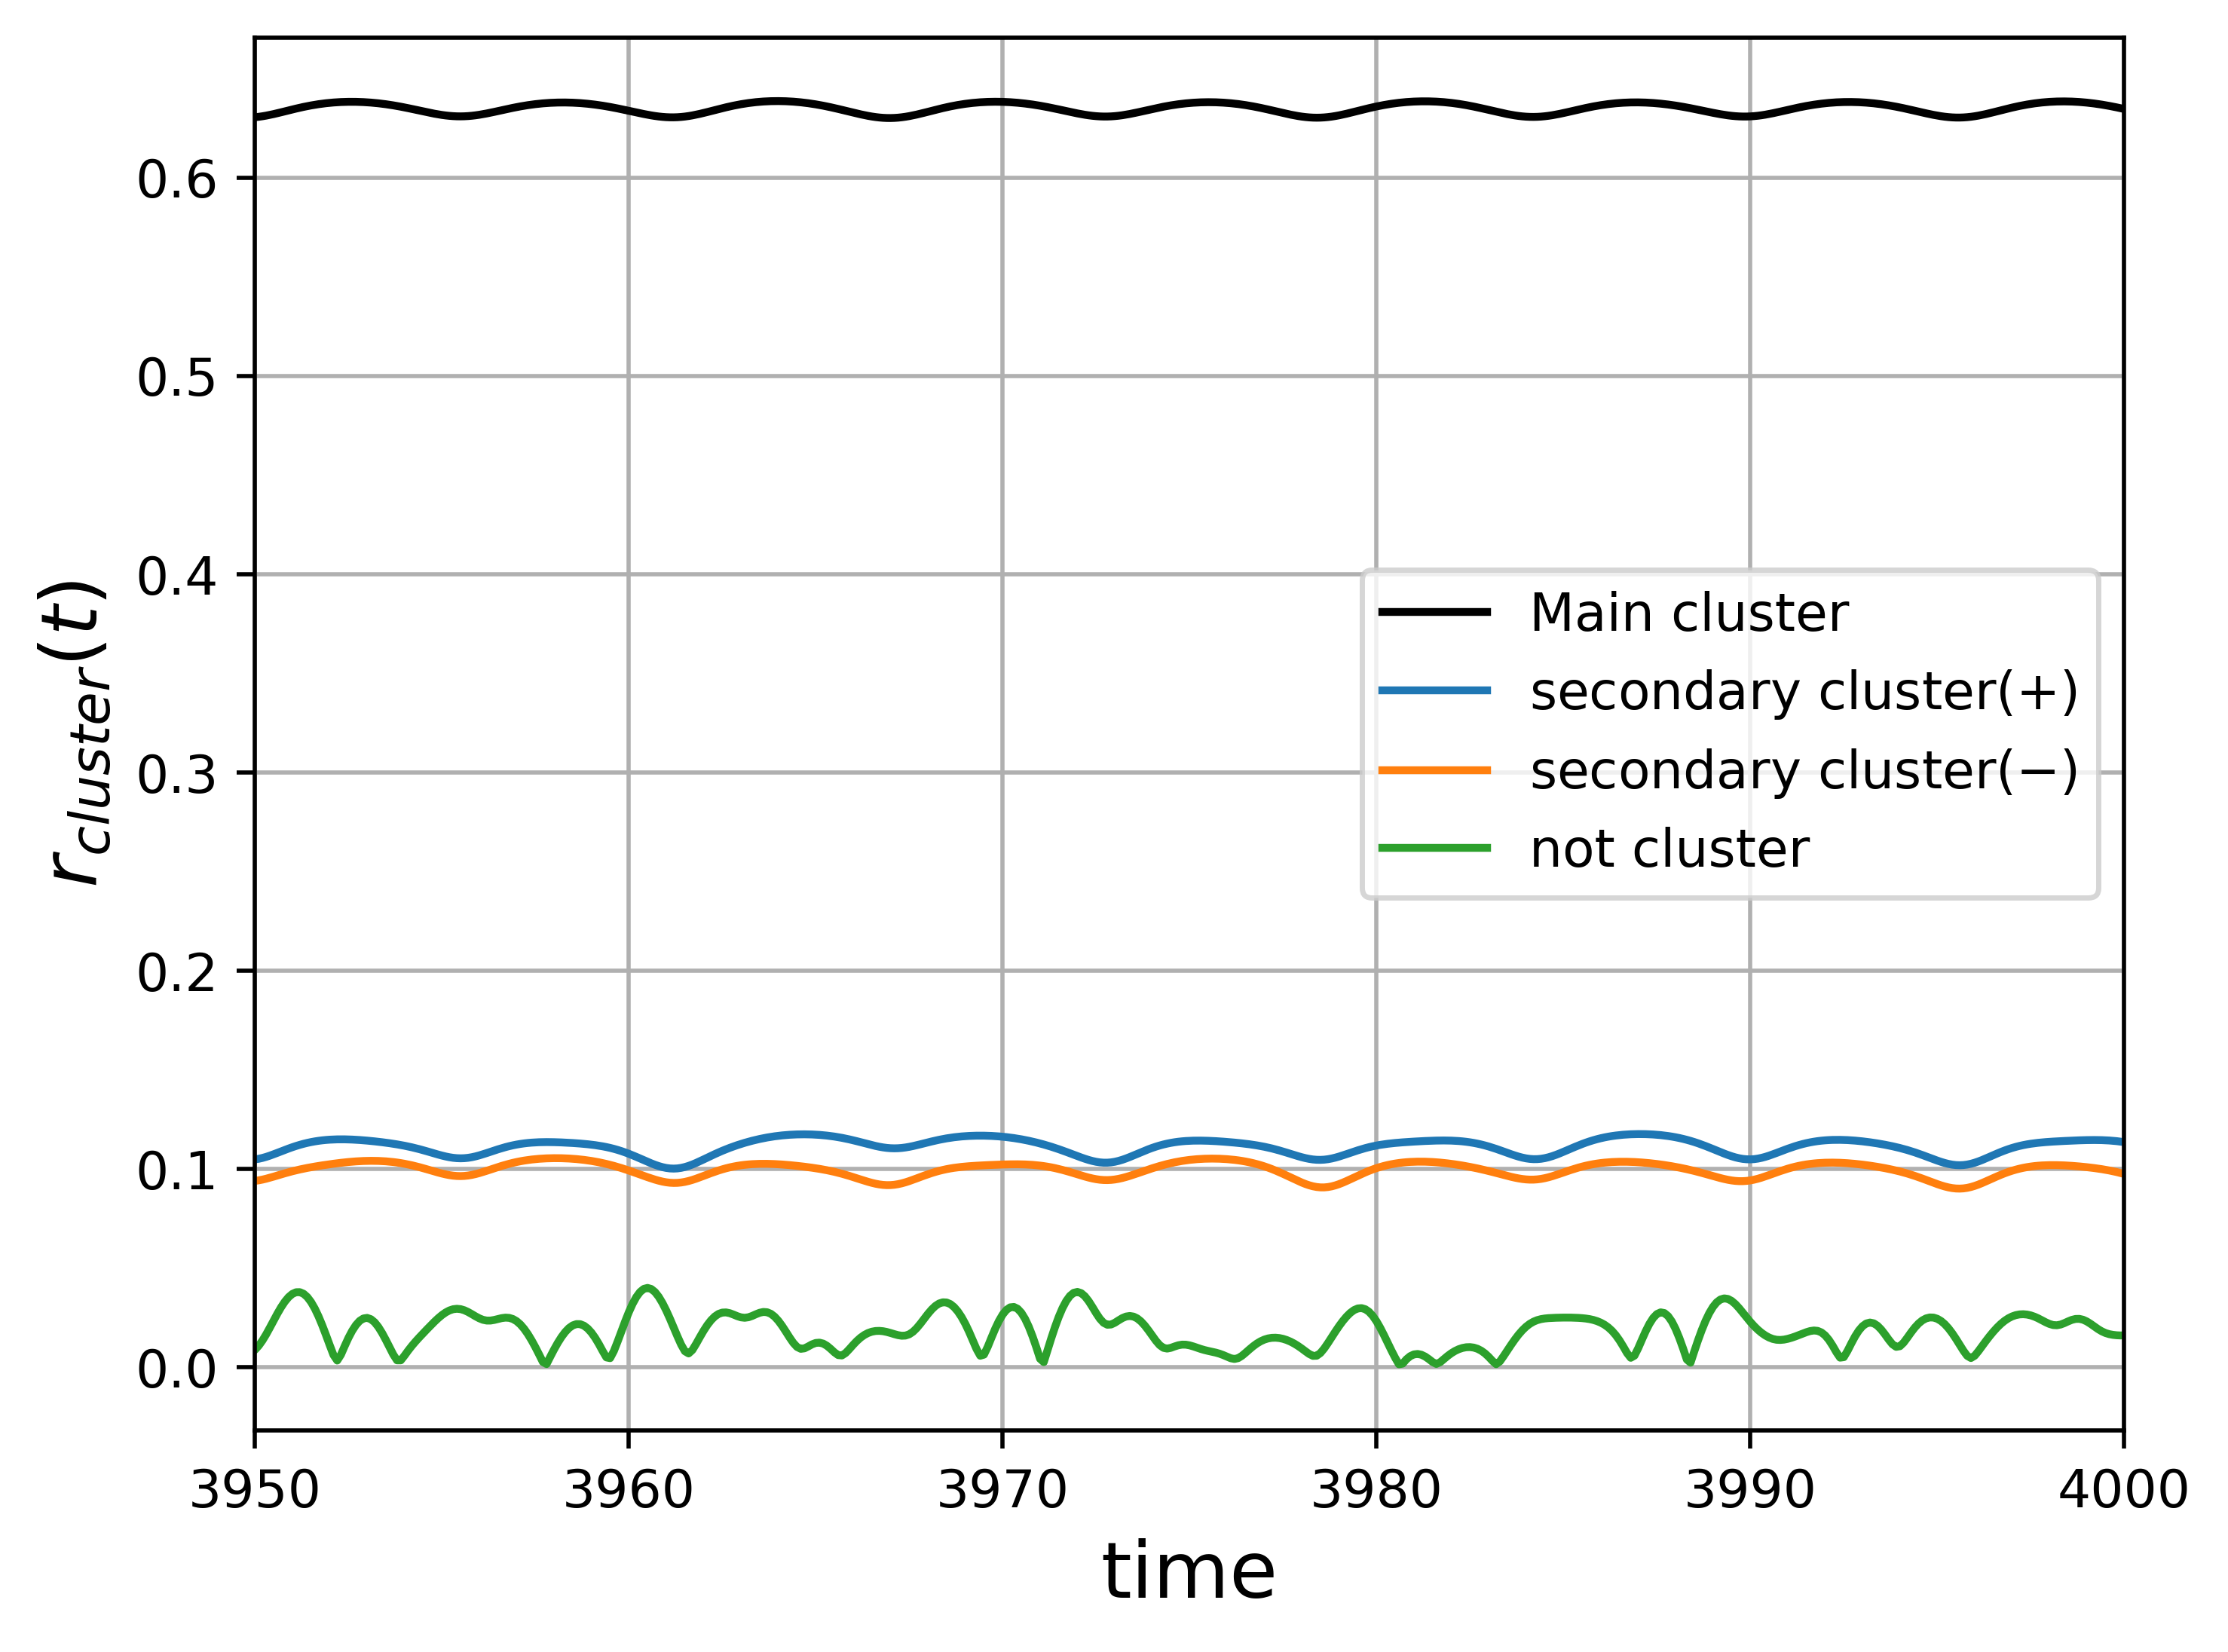

In [12]:
# fig, (ax1,ax2) = plt.subplots(2,1,height_ratios=[1, 2],dpi=500)
plt.figure(dpi=500)
color_clu = ['black']
num = 0 
for rc,name in zip(rs_clu,names):
    if num == 0:
        plt.plot(t, rc, label=name, color='black');num+=1
    else:
        plt.plot(t,rc,label=name)
plt.plot(t, r_nclu, label='not cluster')
plt.grid()
plt.legend()
# plt.legend(loc=3)
plt.xlim(3950, 4000)
plt.ylabel(r'$r_{cluster}(t)$', fontsize=15)
plt.xlabel('time', fontsize=15)
# plt.ylim(0.90,1.0)

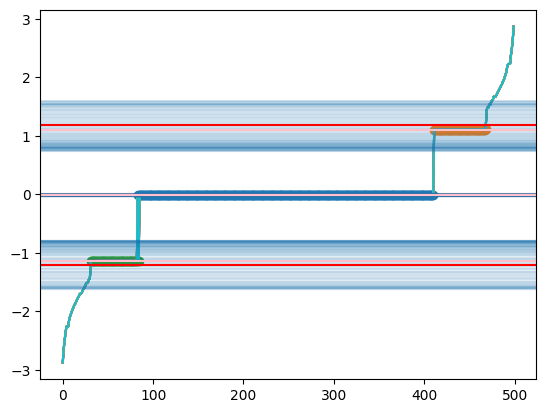

In [20]:
plt.plot(avg_dtheta[-10:].T)
c_o = []
for clu in cluster:
    plt.scatter(clu, avg_dtheta[-1, clu].T)
    for i in range(1, 100):
        plt.axhline(np.mean(dtheta[-i, clu].T), alpha=0.1)
    co = np.mean(omega[clu])
    plt.axhline(co, color='red')
    c_o.append(co)
    plt.axhline(np.mean(avg_dtheta[-1, clu].T), color='pink')

In [15]:
rs_mean = np.array([np.mean(rs[i:i+sum_time], axis=0)
                for i in range(len(t)-sum_time)])
rs_std = np.array([np.std(rs[i:i+sum_time], axis=0)
                    for i in range(len(t)-sum_time)])


Text(0, 0.5, '$\\left\\langle r_{cluster}\\right\\rangle_{t;T_W}$')

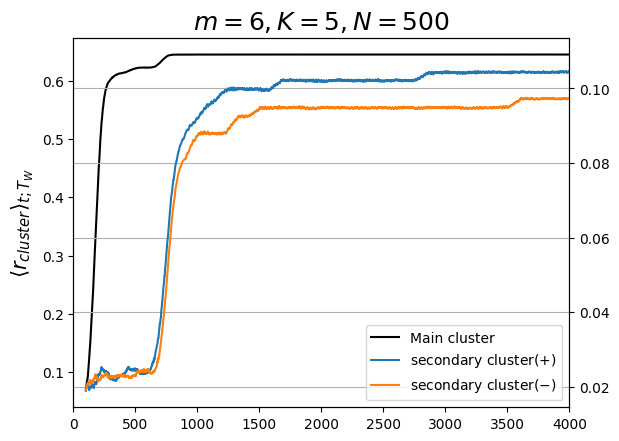

In [22]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
plt.figure()
ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
ax1_ = plt.twinx()
plt.plot(np.NAN, np.NAN, label=names[0], color='black');num+=1

num = 0 
for rc,name in zip(rs_clu_mean,names):
    if num == 0:
        plt.sca(ax1)
        plt.plot(t[sum_time:], rc, label=name, color='black');num+=1
    else:

        plt.sca(ax1_)
        plt.plot(t[sum_time:],rc,label=name)


plt.grid()
plt.legend()
plt.xlim(0, 4000)
plt.sca(ax1)
plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)

# plt.sca(ax2)
# ls = plt.plot(t[500:], avg_dtheta, lw=1)
# color = plt.cm.viridis(np.linspace(0, 1, N, endpoint=True), alpha=0.08)
# for l, c in zip(ls, color):
#     l.set_color(c)

# colors = [plt.cm.Greys(np.linspace(0.7, 1.0, CS[0], endpoint=True))]
# cms = [plt.cm.Blues,plt.cm.Oranges_r,plt.cm.Greens]
# for c,cm in zip(CS[1:],cms):
#     colors.append(cm(np.linspace(0.3,0.7,c,endpoint=True)))
# i = 0
# for c,color in zip(cluster,colors):
#     for l, c in zip(np.array(ls)[c],color):
#         l.set_color(c)
#     i += 1
# plt.grid()
# plt.xlim(0,4000)
# plt.ylabel(r'$\left\langle \dot\theta_i\right\rangle_{t;T_W}$', fontsize=15)

# # plt.ylabel('avg. angular vel.', fontsize=15)
# plt.xlabel('time', fontsize=15)
# plt.show()

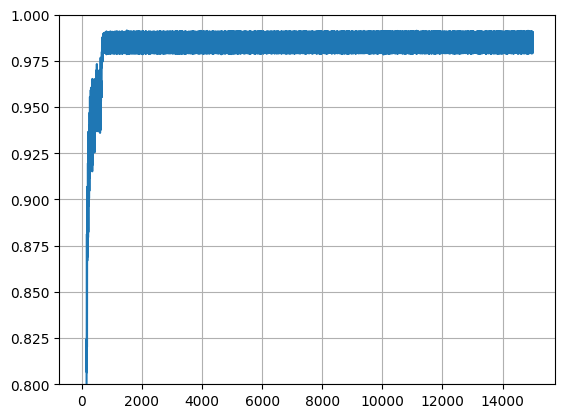

In [26]:
plt.plot(t,np.array(rs_clu[0])*(N/CS[0]),label=names[0])
plt.ylim(0.8,1.0)
plt.grid()

In [60]:
np.mean(np.cos(psi_clu[1])*np.cos(psi_clu[2]))

0.023073697751744036

In [18]:
a = np.mean(np.cos((psi_clu[1]-psi_clu[0])[-500:]))
b = np.mean(np.cos((psi_clu[2]-psi_clu[0])[-500:]))
a,b

(-0.18981554611316617, -0.18398486128972627)

In [13]:
r_= rs_clu[0] + rs_clu[1] *np.cos(psi_clu[1]-psi_clu[0])  + rs_clu[2] *np.cos(psi_clu[2]-psi_clu[0])
r_mean = np.array([np.mean(r_[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])
r_std = np.array([np.std(r_[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])

In [14]:
plt.plot(t[sum_time:],rs_mean,color ='black')
plt.ylabel(r'$\left\langle r_{ori}\right\rangle_{t;T_W}$',fontsize=15)
plt.xlabel('time',size=15)
# plt.twinx()

# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
plt.plot(np.NAN,np.NAN,color ='black',label=r'$\left\langle r_{ori}\right\rangle_{t;T_W}$')
plt.plot(t[sum_time:],r_mean,color ='red',label=r'$\left\langle r\right\rangle_{t;T_W}$')
plt.plot(t[sum_time:],np.array(rs_clu_mean[0])+a*np.array(rs_clu_mean[1])+b*np.array(rs_clu_mean[2]),label=r'$\left\langle r_m\right\rangle_{t;T_W}+a \left\langle r_{s(+)}\right\rangle_{t;T_W}+b \left\langle r_{s(-)}\right\rangle_{t;T_W}$')
plt.legend()
plt.grid()
# plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
plt.tight_layout()
plt.show()


NameError: name 'rs_mean' is not defined

In [ ]:
sum_time

1000

In [ ]:
r_= rs_clu[0] + rs_clu[1] *np.cos(psi_clu[1]-psi_clu[0])  + rs_clu[2] *np.cos(psi_clu[2]-psi_clu[0])
r_mean = np.array([np.mean(r_[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])
r_std = np.array([np.std(r_[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])

(5000.0, 5050.0)

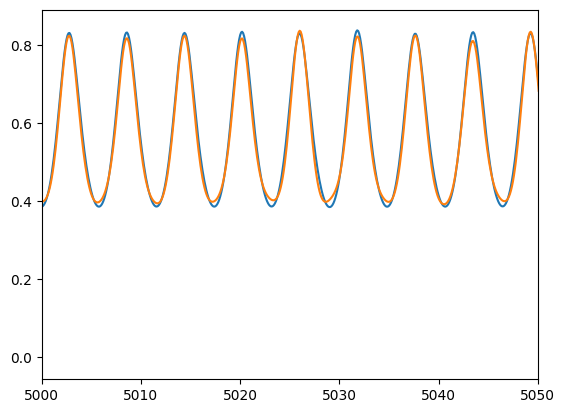

In [121]:
plt.plot(t,r_)
plt.plot(t,rs)

plt.xlim(5000,5050)

In [59]:
np.mean(np.cos(psi_clu[2]-psi_clu[0])[-1000:]**2)

0.5157506335802874

In [16]:
def A(r,K=K,m=m):
    return 1/np.sqrt(K*r*m)

def B(r,CS,CM,K=K,m=m):
    return (CS-CM)/(K*r)
def M_theta(r,CS,CM,K=K,m=m):
    a = A(r,K=K,m=m)
    b = B(r,CS,CM,K=K,m=m)
    return - a**2/(2*b**2)
cm = np.mean(np.cos(psi_clu[1]-psi_clu[0])[-5000:])
M = M_theta(rs_clu_mean[0][-1],CMO[1],CMO[0])
print(cm,M)


-0.1806229399530883 -0.19031857725206788


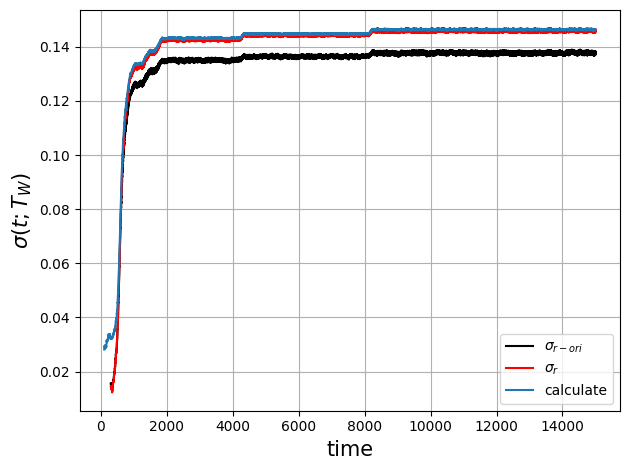

In [17]:
plt.plot(t[sum_time+2000:],rs_std[2000:],color ='black',label=r'$\sigma_{r-ori}$')
plt.plot(t[sum_time+2000:],r_std[2000:],color ='red',label=r'$\sigma_{r}$')

plt.ylabel(r'$\sigma(t;T_W)$',fontsize=15)
plt.xlabel('time',size=15)
# plt.twinx()

# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
# plt.plot(np.NAN,np.NAN,color ='black',label=r'$\sigma(t)$')
# plt.plot(t[sum_time:],rs_clu_mean[1],label=names[1])
# plt.plot(t[sum_time:],rs_clu_mean[2],label=names[2])

# plt.plot(t[sum_time:],(2**0.5)*(rs_clu_mean[1]+rs_clu_mean[2])/2,label='with r')
plt.plot(t[sum_time:],(2**0.5)*((1-2*M**2)**0.5)*(rs_clu_mean[1]+rs_clu_mean[2])/2,label='calculate')
# plt.plot(t[sum_time:],(2)*((0.516-0.18**2)**0.5)*(rs_clu_mean[1]+rs_clu_mean[2])/2,label='mean')
# plt.plot(t,(rs_clu[1]+rs_clu[2])/2,label=names[1])
plt.legend()
plt.grid()
# plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
plt.tight_layout()
plt.show()


In [87]:
plt.plot(np.cos((psi2-psi1)))
plt.plot(np.cos((psi3-psi1)))
plt.plot(np.cos((psi4-psi1)))
plt.xlim(0, 500)

NameError: name 'psi2' is not defined

NameError: name 'r_avg' is not defined

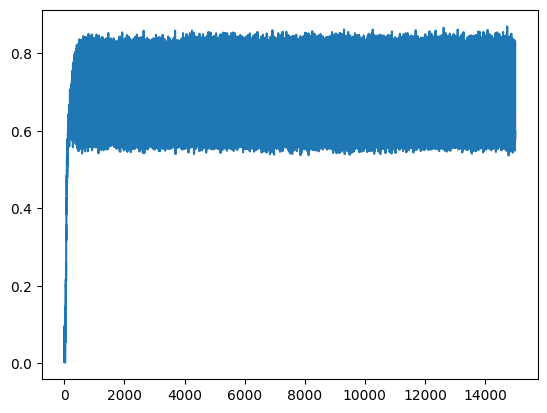

In [88]:
plt.plot(t, rs)
plt.plot(t, r_avg)
# plt.xlim(0,500)
# plt.xlim(0,5000)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 2., 5., 7., 3., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-3.23541133, -3.1177251 , -3.00003887, -2.88235263, -2.7646664 ,
        -2.64698017, -2.52929393, -2.4116077 , -2.29392147, -2.17623524,
        -2.058549  , -1.94086277, -1.82317654, -1.7054903 , -1.58780407,
        -1.47011784, -1.3524316 , -1.23474537, -1.11705914, -0.9993729 ,
        -0.88168667, -0.76400044, -0.64631421, -0.52862797, -0.41094174,
        -0.29325551, -0.17556927, -0.05788304,  0.05980319,  0.17748943,
         0.29517566,  0.41286189,  0.53054813,  0.64823436,  0.76592059,
         0.88360682,  1.00129306,  1.11897929,  1.23666552,  1.35435176,
         1.47203799,  1.58972422,  1.70741046,  1.82509669,  1.94278292,
         2.06046915,  2.17815539,  2.29584162,  2.41352785,  2.53121409,
         2.64890032]),
 <BarContainer object

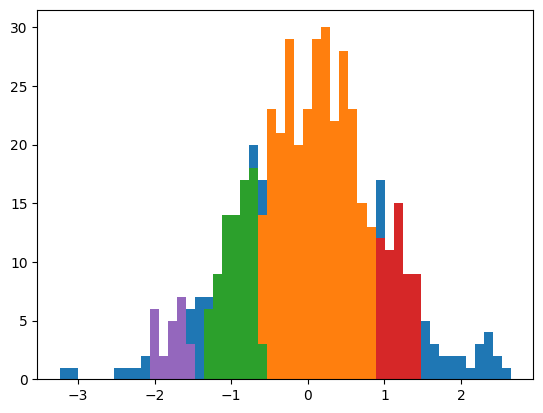

In [ ]:
c, b, _ = plt.hist(omega, bins=50)
plt.hist(omega[cluster[0]], bins=b)
plt.hist(omega[cluster[1]], bins=b)
plt.hist(omega[cluster[2]], bins=b)
plt.hist(omega[cluster[3]], bins=b)

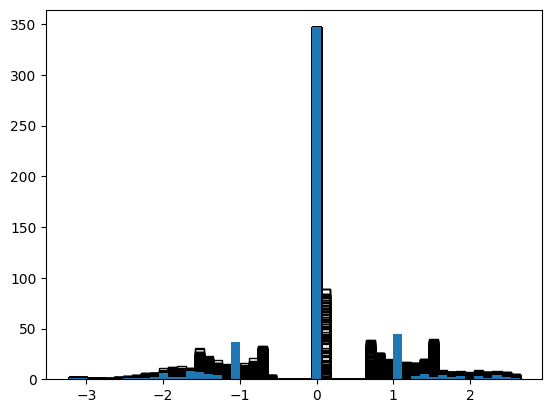

In [100]:
h, b, l = plt.hist(avg_dtheta[-1], bins=50)
for i in range(1, 500):
    plt.hist(dtheta[-i], bins=b, fill=False)
h, b, l = plt.hist(avg_dtheta[-1], bins=50)

# plt.hist(omega[cluster[0]],bins=b)
# plt.hist(omega[cluster[1]],bins=b)
# plt.hist(omega[cluster[2]],bins=b)
# plt.hist(omega[cluster[3]],bins=b)

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  6.,  2.,  5.,
         7.,  6.,  7.,  7.,  9., 14., 14., 17., 20., 17., 23., 21., 29.,
        20., 23., 29., 30., 22., 28., 23., 15., 13., 17., 11., 15.,  9.,
         9.,  5.,  3.,  2.,  2.,  2.,  1.,  3.,  4.,  2.,  1.]),
 array([-3.23541133, -3.1177251 , -3.00003887, -2.88235263, -2.7646664 ,
        -2.64698017, -2.52929393, -2.4116077 , -2.29392147, -2.17623524,
        -2.058549  , -1.94086277, -1.82317654, -1.7054903 , -1.58780407,
        -1.47011784, -1.3524316 , -1.23474537, -1.11705914, -0.9993729 ,
        -0.88168667, -0.76400044, -0.64631421, -0.52862797, -0.41094174,
        -0.29325551, -0.17556927, -0.05788304,  0.05980319,  0.17748943,
         0.29517566,  0.41286189,  0.53054813,  0.64823436,  0.76592059,
         0.88360682,  1.00129306,  1.11897929,  1.23666552,  1.35435176,
         1.47203799,  1.58972422,  1.70741046,  1.82509669,  1.94278292,
         2.06046915,  2.17815539,  2.29584162,  2.41352785,

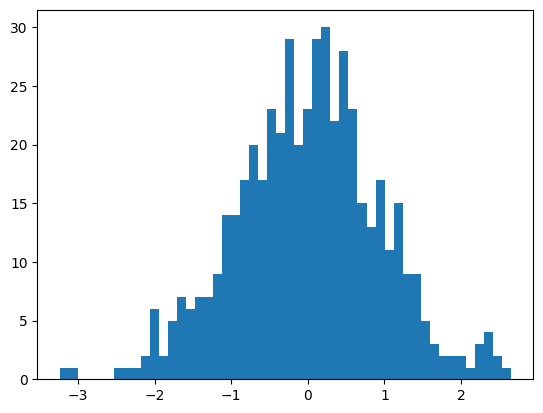

In [ ]:
dpsi = np.diff(np.cos((psi2-psi1)))/0.1

(-1.5, 1.5)

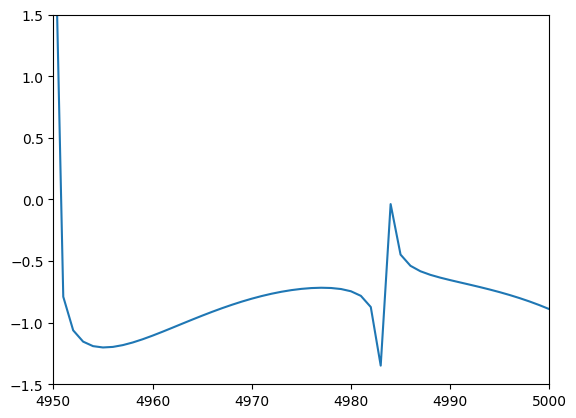

In [ ]:
plt.plot(np.diff(-np.cos((psi2-psi1)))*10/np.sin((psi2-psi1))[1:])
plt.xlim(4950, 5000)
plt.ylim(-1.5, 1.5)

In [ ]:
rs_mean = np.array([np.mean(rs[i:i+sum_time], axis=0)
                for i in range(len(t)-sum_time)])

In [115]:
r_= rs_clu[0] + rs_clu[1] *np.cos(psi_clu[1]-psi_clu[0])  + rs_clu[2] *np.cos(psi_clu[2]-psi_clu[0])
r_mean = np.array([np.mean(r_[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])
r_std = np.array([np.std(r_[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])

In [131]:
# sum_time=5000
p1_cos = np.cos(psi_clu[1]-psi_clu[0])
p1_mean = np.array([np.mean(p1_cos[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])

p2_cos = np.cos(psi_clu[2]-psi_clu[0])
p2_mean = np.array([np.mean(p2_cos[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])



(12000.0, 12030.0)

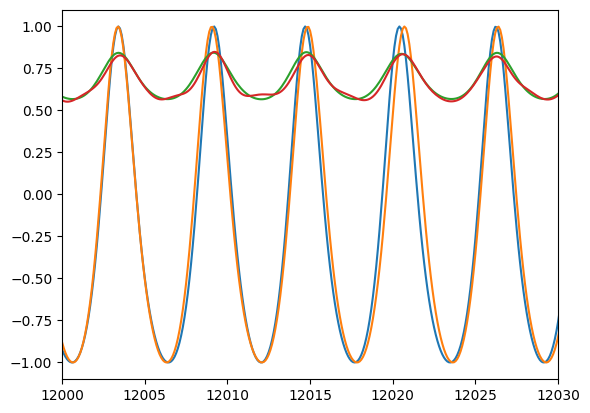

In [139]:
plt.plot(t,p1_cos)
plt.plot(t,p2_cos)
plt.plot(t,r_)
plt.plot(t,rs)
plt.xlim(12000,12030)

In [155]:
norm_dtheta = 1 + (dtheta/(np.max(dtheta)-np.min(dtheta)))/2
c_ = cluster[1][0]
xc = (np.sin(theta[:,c_]-theta[:,N//2])*norm_dtheta[:,c_])[-500:]
yc = (np.cos(theta[:,c_]-theta[:,N//2])*norm_dtheta[:,c_])[-500:]


c_2 = cluster[2][0]
xc2 = (np.sin(theta[:,c_2]-theta[:,N//2])*norm_dtheta[:,c_2])[-500:]
yc2 = (np.cos(theta[:,c_2]-theta[:,N//2])*norm_dtheta[:,c_2])[-500:]

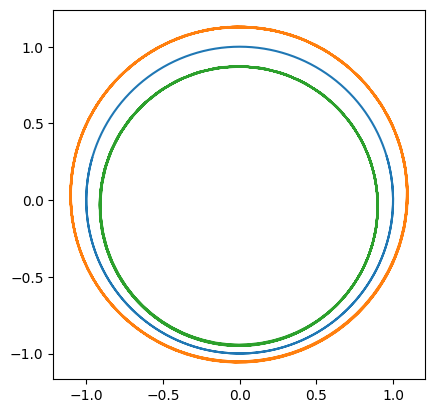

In [157]:
x = np.arange(-5,5,0.01)
plt.plot(np.sin(x),np.cos(x))
plt.gca().set_aspect('equal')
plt.plot(xc,yc)
plt.plot(xc2,yc2)

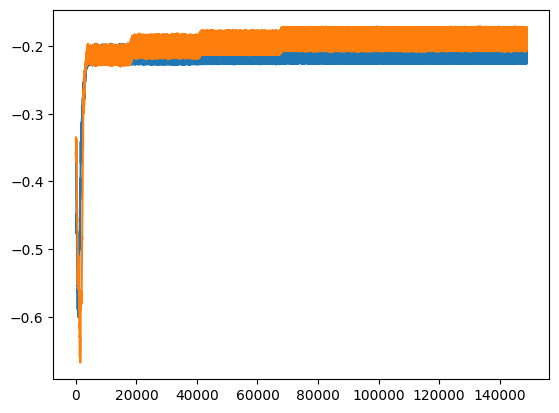

In [132]:
plt.plot(p1_mean)
plt.plot(p2_mean)

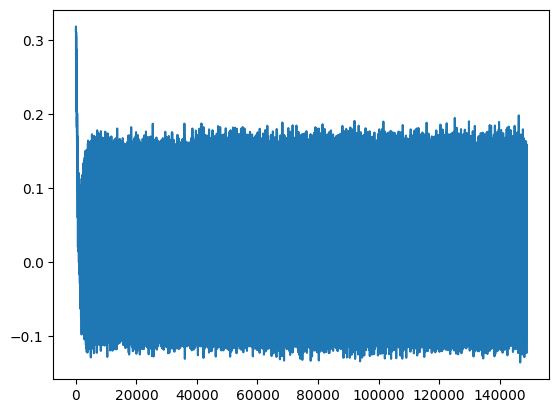

In [134]:
plt.plot(t[sum_time],rs[sum_time:]-rs_mean)


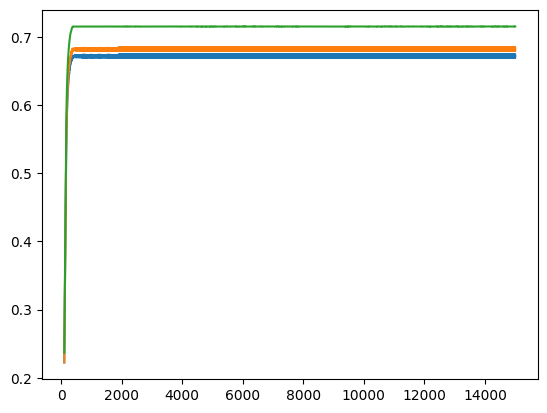

In [133]:
plt.plot(t[sum_time:],rs_mean)
plt.plot(t[sum_time:],r_mean)
plt.plot(t[sum_time:],rs_clu_mean[0])

(-1.5, 0.0)

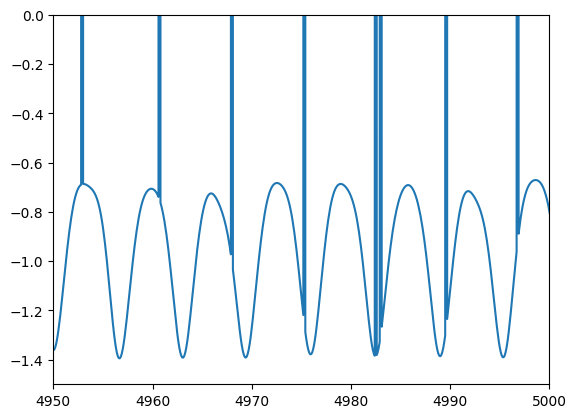

In [ ]:
plt.plot(t[:-1], dpsi)
plt.xlim(4950, 5000)
plt.ylim(-1.5, 0)

In [ ]:
n = len(t)
k = np.arange(n)
Fs = 1/0.1
T = n/Fs
freq = k/T

In [60]:
from scipy import signal

In [61]:
f, time, Zxx = signal.stft(rs, 10, nperseg=1500,noverlap=1400)
time.shape

(1501,)

In [21]:
rs_clu_mean[0][-1]


0.6347510297357236

In [20]:
rs_clu_mean[2][-1]

0.10167730408875306

Text(0, 0.5, 'Cluster size')

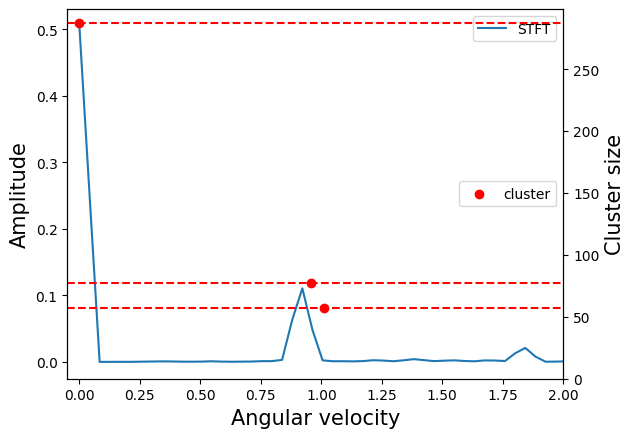

In [62]:
l, = plt.plot(f*(2*np.pi), abs(Zxx.T[-500]),label='STFT')
plt.legend(loc=1)
plt.xlabel('Angular velocity',size=15)
plt.ylabel('Amplitude',size=15)
plt.twinx()

s=plt.scatter(np.abs(CMO-CMO[0]), CS,color='red',label='cluster')
plt.legend(loc=5)

plt.axhline(CS[1],ls='--',color='red')
plt.axhline(CS[0],ls='--',color='red')
plt.axhline(CS[2],ls='--',color='red')
plt.ylim(0)
# plt.axhline(abs(CS[2]-CS[1]), color='green', ls='--')
# plt.axhline((CS[0]-abs(CS[2]-CS[1])), color='green', ls='--')
plt.xlim(-0.05, 2)
plt.ylabel('Cluster size',size=15)

In [64]:
arg = np.argsort(abs(Zxx.T[-500]))[::-1]

In [56]:
np.abs((CMO) - CMO[0]), np.abs((CMO) - CMO[1]),

(array([0.        , 1.00085065, 0.99538513, 1.80424762]),
 array([1.00085065, 0.        , 1.99623578, 0.80339697]))

In [57]:
sum_time

500

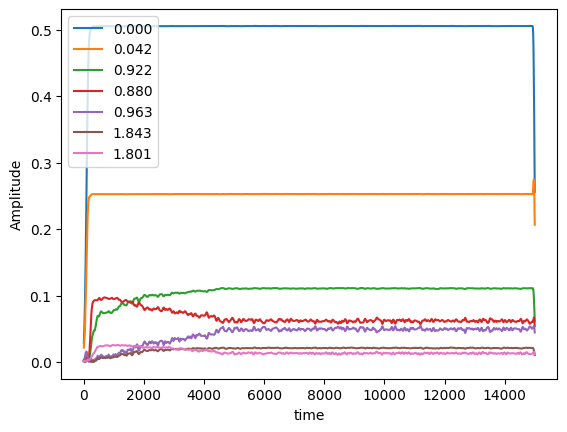

In [67]:
label = [f'{f_*(2*np.pi):.03f}' for f_ in  f[arg][:7]]
ln = plt.plot(time, abs(Zxx[arg][:7]).T, label=label)
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.legend()

In [ ]:
t

array([0.00000e+00, 1.00000e-01, 2.00000e-01, ..., 1.49998e+04,
       1.49999e+04, 1.50000e+04])

IndexError: list index out of range

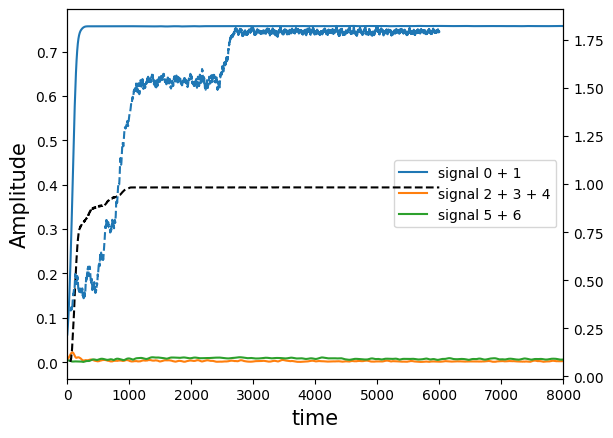

In [101]:
label = [f'{f_*(2*np.pi):.03f}' for f_ in  f[arg][:4]]
# ln = plt.plot(time, abs(Zxx[arg][:4]).T, label=label)
ln = plt.plot(time, abs(Zxx[arg][0]).T+ abs(Zxx[arg][1]).T,label = f'signal 0 + 1')#, label=label)
ln = plt.plot(time, abs(Zxx[arg][2]).T+ abs(Zxx[arg][3]).T+abs(Zxx[arg][4]).T,label = f'signal 2 + 3 + 4')#, label=label)
ln = plt.plot(time, abs(Zxx[arg][5]).T+abs(Zxx[arg][6]).T,label = f'signal 5 + 6')#, label=label)
plt.ylabel('Amplitude', fontsize=15)
plt.xlabel('time',size=15)

# ln = plt.plot(time, abs(Zxx[arg][0].T)+abs(Zxx[arg][1]).T, label=f[arg][:5]*(2*np.pi))
# for c in CS:
#     plt.axhline(c, color='red')
# plt.axhline(CS[1]+CS[2], color='green')
# plt.axhline(CS[0]-abs(CS[1]-CS[2]), color='green', ls='--')
plt.legend(loc=5)
plt.xlim(0,8000)
plt.twinx()
# plt.figure()
num = 0 
for rc,name in zip(rs_clu_mean,names):
    if num == 0:
        plt.plot(t[sum_time:], rc, label=name, color='black',ls='--',zorder=0);num+=1
    else:
        # plt.plot(t[sum_time:],rc,label=name,ls='--')
        pass
plt.plot(t[sum_time:],rs_clu_mean[1]+rs_clu_mean[2],label='secondary cluster',ls='--',zorder=0)
plt.plot(t[sum_time:],rs_clu_mean[3],label='secondary cluster',ls='--',zorder=0)
plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)

plt.xlim(0,3000)
# plt.axhline(CS[3],color = 'green')
plt.legend()
# plt.axvline(time[-100])
# plt.show()
# plt.twinx()
# plt.plot(t[sum_time:],r1_mean,label='Main cluster',color ='black')
# plt.plot(t[sum_time:],r2_mean,label='secondary cluster(+)')
# plt.plot(t[sum_time:],r3_mean,label='secondary cluster(-)')
# color = plt.cm.viridis(np.linspace(0,1,len(ln)))
# for l,c in zip(ln,color):
# l.set_color(c)
# plt.legend()

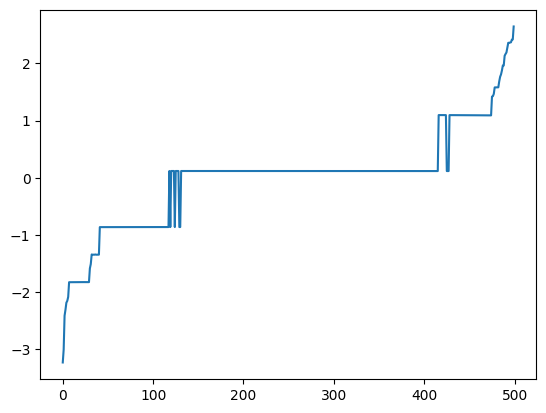

In [ ]:
plt.plot(avg_dtheta[-1])

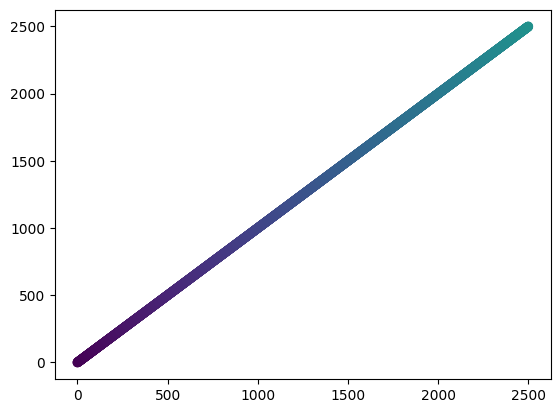

In [ ]:
plt.scatter(np.arange(len(ln)), np.arange(len(ln)), c=color)

(5000.0, 75062.5)

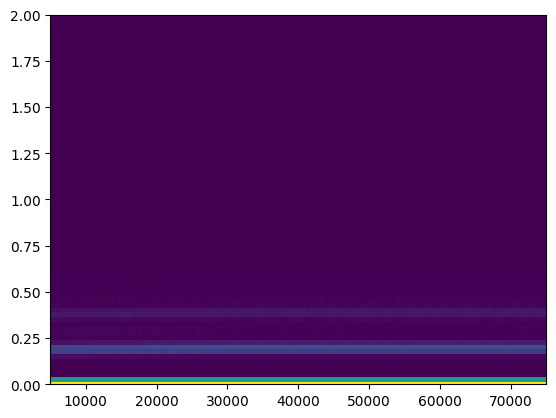

In [ ]:
plt.pcolormesh(t, 2*np.pi*f, np.abs(Zxx), vmax=0.5)
# plt.ylim(-0.5)
plt.ylim(0, 2)
plt.xlim(5000)

23.05.11에 작성한것에 일부 있음 그부분 참고하기

In [49]:
sum_time = 500
dtheta_c = np.cumsum(dtheta, axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

In [50]:
avg_dtheta_p, = np.where(avg_dtheta[-1]>0)
avg_dtheta_m, = np.where(avg_dtheta[-1]<=0)

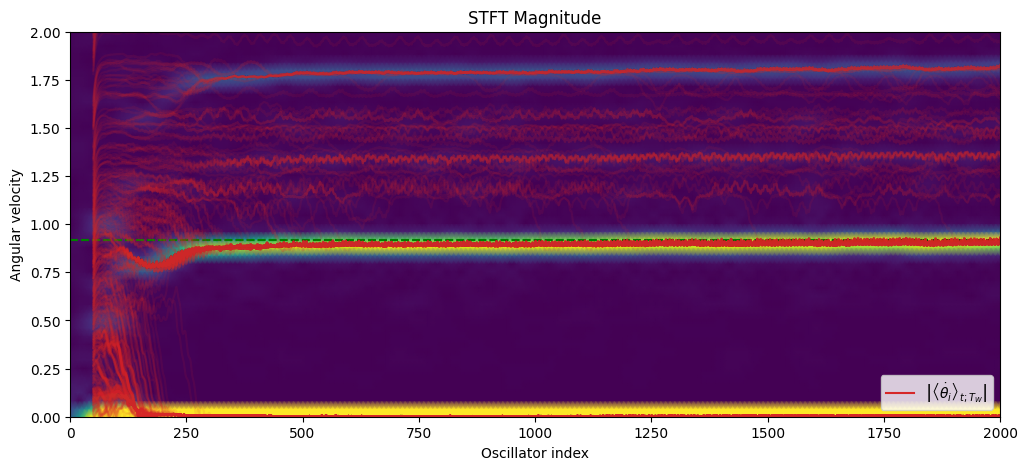

In [68]:
plt.figure(figsize=(12, 5))
plt.pcolormesh(time, f*(2*np.pi), np.abs(Zxx), vmin=0, vmax=0.1, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Angular velocity')
plt.grid()

plt.xlabel('Time')
plt.ylim([0, 1])  # plt.show()

ax = plt.gca()
plt.xlim(0,2000)
# plt.twiny()
# plt.twiny()
plt.xlabel('Oscillator index')
# plt.axhline(CMP[0],color='green',ls='--')
plt.axhline(abs(CMP[1]-CMP[0]),color='green',ls='--')
plt.axhline(abs(CMP[2]-CMP[0]),color='green',ls='--')
# plt.axhline(abs(CMP[3]-CMP[0])/(2*np.pi),color='green',ls='--')
plt.ylim(0, 2)
# plt.plot()
# ax.twiny()
# plt.plot(abs(avg_dtheta[-1]-avg_dtheta[-1][N//2])/(2*np.pi), color='tab:red')
plt.plot(t[sum_time:],abs(avg_dtheta[:]-avg_dtheta[-1][N//2]), color='tab:red',alpha=0.1);
plt.plot(np.NAN,np.NAN,color='tab:red',label = r'$\left|\left\langle\dot{\theta}_i\right\rangle_{t;T_W}\right|$')
# plt.plot(t[sum_time:],abs(avg_dtheta[:,avg_dtheta_m]-avg_dtheta[-1][N//2])/(2*np.pi), color='tab:blue',alpha=0.3);
plt.legend(loc=4)
plt.grid()
plt.show()

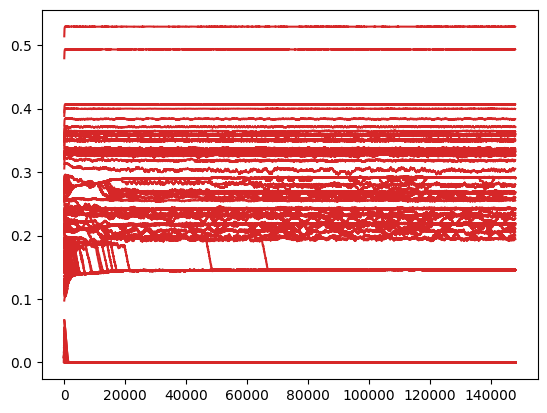

In [25]:
plt.plot(abs(avg_dtheta-avg_dtheta[-1][N//2])/(2*np.pi), color='tab:red');


In [ ]:
print((CMP[1]-CMP[0])/(2*np.pi))
print((CMP[2]-CMP[0])/(2*np.pi))

-0.15633425644102192
0.15521280702046467


## with diffrent condition

In [78]:
seed = 10
N = 500
theta_random, omega, Kc = Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
K = 3.9
dt = 0.1
t = np.arange(0, 15000+dt/2, dt)
theta, dtheta, rs = mf2(K, N=N, m=m, t_array=t,
                        p_theta=theta_random, p_dtheta=0*omega, p_omega=omega)
# sum_time = 2000
if dt <0.1:
    t = t[::10]
    theta = theta[::10]
    dtheta = dtheta[::10]
    rs = rs[::10]
sum_time = 2000
dtheta_c = np.cumsum(dtheta, axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)

CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=1e-2, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS

array([287,  77,  57])

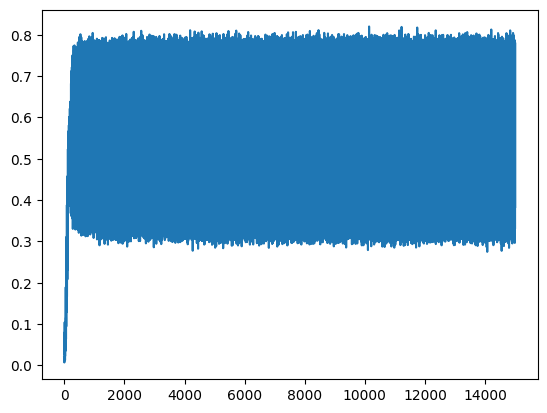

In [79]:
plt.plot(t,rs)

In [80]:
f, time, Zxx = stft(rs, 10, nperseg=2000,noverlap=1900)

In [81]:
sum_time = 2000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time


In [82]:
avg_dtheta_init = (dtheta_c[:sum_time].T/np.arange(1,sum_time+1)).T
avg_dtheta = np.concatenate((avg_dtheta_init,avg_dtheta),axis=0)

In [83]:
plt.show()

In [84]:
CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=1e-2, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS

array([287,  77,  57])

In [85]:
names = []
for i in CMO:
    ro = i-CMO[0]
    if ro==0:names.append('Main cluster')
    elif ro<0:names.append('secondary cluster(-)')
    else:names.append('secondary cluster(+)')

In [86]:
Zxx.shape

(1001, 1502)

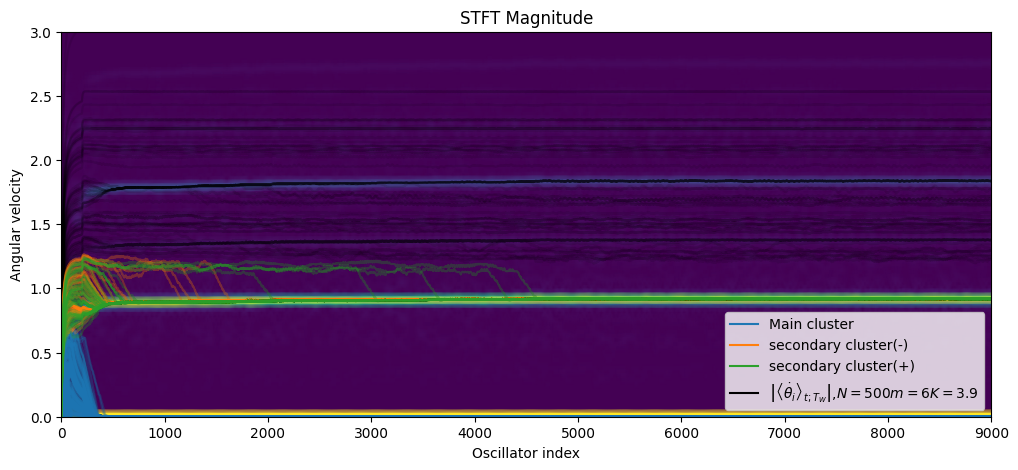

In [87]:
plt.figure(figsize=(12, 5))
plt.pcolormesh(time, f*(2*np.pi), np.abs(Zxx), vmin=0, vmax=0.1, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Angular velocity')
plt.grid()

plt.xlabel('Time')
plt.ylim([0, 1])  # plt.show()

ax = plt.gca()
plt.xlim(0,9000)
# plt.twiny()
# plt.twiny()
plt.xlabel('Oscillator index')
# plt.axhline(CMP[0],color='green',ls='--')
# plt.axhline(abs(CMP[1]-CMP[0]),color='green',ls='--')
# plt.axhline(abs(CMP[2]-CMP[0]),color='green',ls='--')
# plt.axhline(abs(CMP[3]-CMP[0])/(2*np.pi),color='green',ls='--')
plt.ylim(0, 3)
# plt.plot()
# ax.twiny()
# plt.plot(abs(avg_dtheta[-1]-avg_dtheta[-1][N//2])/(2*np.pi), color='tab:red')
plt.plot(t,abs(avg_dtheta[:]-avg_dtheta[-1][N//2]), color='black',alpha=0.1);
clu_color = ['tab:blue','tab:orange','tab:green','tab:pink']
for clu,c,name in zip(cluster,clu_color,names):
    plt.plot(t,abs(avg_dtheta[:,clu]-avg_dtheta[-1][N//2]),alpha=0.3,color = c);
    plt.plot(np.NAN,np.NAN,color=c,label = name)


plt.plot(np.NAN,np.NAN,color='black',label = r'$\left|\left\langle\dot{\theta}_i\right\rangle_{t;T_W}\right|$,'+rf'$N={N} m = {m} K = {K}$')
# plt.plot(t[sum_time:],abs(avg_dtheta[:,avg_dtheta_m]-avg_dtheta[-1][N//2])/(2*np.pi), color='tab:blue',alpha=0.3);
plt.legend(loc=4)
plt.grid()
plt.show()

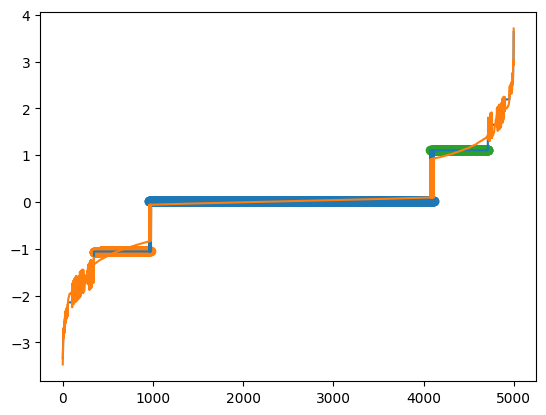

In [120]:
plt.plot(avg_dtheta[-1])
for clu in cluster:
    plt.scatter(clu,avg_dtheta[-1,clu])

plt.plot(dtheta[-1])
plt.show()

In [150]:
x = np.linspace(-5,5,100)
y = lambda r,x=x:r*x-x**3 

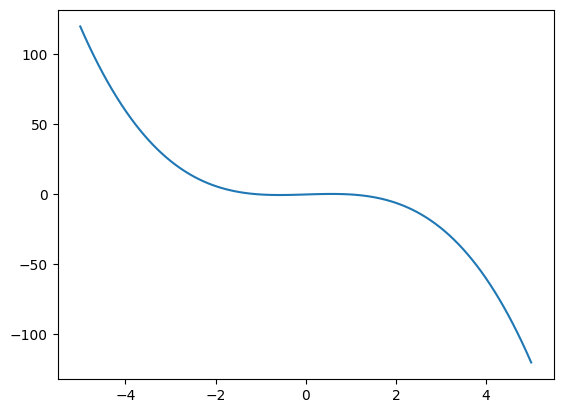

In [152]:
plt.plot(x,y(1))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5,5,1000)
y = np.linspace(0,5,1000)

In [3]:
beta = x/np.tanh(x)

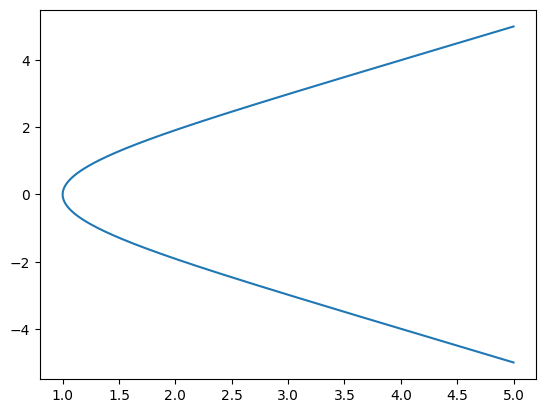

In [4]:
plt.plot(beta,x)
plt.plot()

In [35]:
x = np.linspace(-5,5,1000)
r = np.linspace(-5,5,100)


In [36]:
V  = lambda r,x:(-1/2)*r*x**2 + (1/4) * x**4 

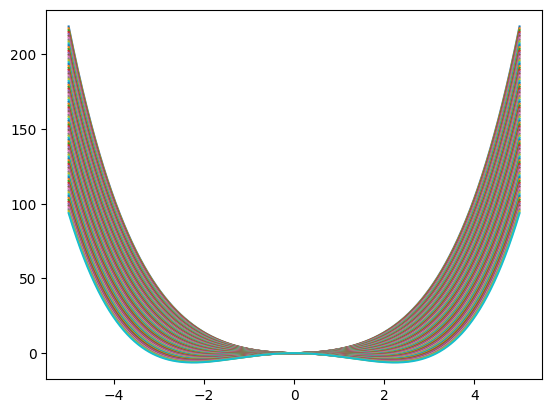

In [37]:
for i in r:
    plt.plot(x,V(i,x))
# plt.xlim(-3,3)

In [38]:
from scipy.integrate import solve_ivp